###  Download entire list of NSE stock code 

In [436]:
from bs4 import BeautifulSoup
import requests

In [437]:
# URL to download all the stock codes in NSE
url = 'https://www.nseindia.com/market-data/securities-available-for-trading'
response = requests.get(url,headers={'User-Agent': 'Mozilla/5.0'})
soup = BeautifulSoup(response.text,'lxml')
response

<Response [200]>

In [438]:
# downloading the stock code file
equity_class = soup.find('a',{'class':'file file--mime-application-pdf file--application-pdf pdf-download-link'})
equity_file = requests.get(equity_class.get('href'))
file = open("NSE_StockCode_List.csv", 'wb')
file.write(equity_file.content)
file.close()

In [439]:
#DataFrame to read the stock code 
import pandas as pd 
stock_code = pd.read_csv('NSE_StockCode_List.csv')
stock_code.head(5)

SYMBOL                           NAME OF COMPANY  SERIES  \
0   20MICRONS                        20 Microns Limited      BE   
1  21STCENMGM  21st Century Management Services Limited      EQ   
2      360ONE                       360 ONE WAM LIMITED      EQ   
3   3IINFOLTD                       3i Infotech Limited      EQ   
4     3MINDIA                          3M India Limited      EQ   

   DATE OF LISTING   PAID UP VALUE   MARKET LOT   ISIN NUMBER   FACE VALUE  
0      06-OCT-2008               5            1  INE144J01027            5  
1      03-MAY-1995              10            1  INE253B01015           10  
2      19-SEP-2019               1            1  INE466L01038            1  
3      22-OCT-2021              10            1  INE748C01038           10  
4      13-AUG-2004              10            1  INE470A01017           10

In [440]:
# checking for null values
stock_code.isnull().any()

SYMBOL              False
NAME OF COMPANY     False
 SERIES             False
 DATE OF LISTING    False
 PAID UP VALUE      False
 MARKET LOT         False
 ISIN NUMBER        False
 FACE VALUE         False
dtype: bool

In [441]:
# Checking for duplicates
stock_code[stock_code.duplicated()].shape

(0, 8)

### Input from user on the required stock 

In [442]:
# print('Enter a stock code or Name of the Company whose stocks you woukd like to look at')

# Input user stock
from datetime import date
req_stock = input('Enter a Stock Code or Name of the Company whose stocks you would like to look at')

# check for the stock's existence and enter start and end date
if req_stock in (list(stock_code['SYMBOL']) or list(stock_code['NAME OF COMPANY'])):
    print('Enter the start and end dates for the stock prices in the format in YYYY-MM-DD')
    date_s = input('Start Date:').split('-')
    date_e = input('End Date:').split('-')
else:
    print('Stock not found. Try again')


# Storing the dates in the date format
year, month, day = (int(i) for i in date_s)
start = date(year,month,day)

year, month, day = (int(i) for i in date_e)
end = date(year,month,day)

Enter a Stock Code or Name of the Company whose stocks you would like to look atRELIANCE
Enter the start and end dates for the stock prices in the format in YYYY-MM-DD
Start Date:2015-01-01
End Date:2022-12-31


### Download the input stock data between the start and end day

In [443]:
# pip install yfinance

In [444]:
import yfinance as yf
stock_data = yf.download(req_stock+'.NS',start,end)

[*********************100%***********************]  1 of 1 completed


In [445]:
stock_data.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2015-01-01  438.988831  441.812073  437.676270  439.781311  417.988922   
2015-01-02  439.880371  443.818054  437.998199  438.617340  416.882629   
2015-01-05  438.344940  441.267212  432.946106  433.812897  412.316223   
2015-01-06  430.915344  432.401276  412.093750  414.124512  393.603485   
2015-01-07  414.619812  425.367950  414.570282  423.139069  402.171295   

             Volume  
Date                 
2015-01-01  1367720  
2015-01-02  3383424  
2015-01-05  4662967  
2015-01-06  8596809  
2015-01-07  9562421

In [446]:
stock_data.shape

(1976, 6)

In [447]:
stock_data.isnull().any()

Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [448]:
stock_data[stock_data.duplicated()].shape

(0, 6)

In [449]:
# Make date as a column
stock_data.reset_index(inplace = True)
stock_data

Date         Open         High          Low        Close  \
0    2015-01-01   438.988831   441.812073   437.676270   439.781311   
1    2015-01-02   439.880371   443.818054   437.998199   438.617340   
2    2015-01-05   438.344940   441.267212   432.946106   433.812897   
3    2015-01-06   430.915344   432.401276   412.093750   414.124512   
4    2015-01-07   414.619812   425.367950   414.570282   423.139069   
...         ...          ...          ...          ...          ...   
1971 2022-12-26  2514.750000  2542.000000  2492.399902  2524.050049   
1972 2022-12-27  2530.000000  2548.800049  2515.250000  2544.699951   
1973 2022-12-28  2538.000000  2549.800049  2521.500000  2544.449951   
1974 2022-12-29  2527.000000  2548.899902  2525.500000  2543.300049   
1975 2022-12-30  2545.100098  2577.000000  2541.100098  2547.199951   

        Adj Close   Volume  
0      417.988922  1367720  
1      416.882629  3383424  
2      412.316223  4662967  
3      393.603485  8596809  
4      402.171295  9562421  
...           ...      ...  
1971  2524.050049  2764496  
1972  2544.699951  2659749  
1973  2544.449951  3442509  
1974  2543.300049  3198493  
1975  2547.199951  3364092  

[1976 rows x 7 columns]

In [450]:
# Divide date into columns of year, month and day 
stock_data_edit = stock_data.copy()
stock_data_edit.insert(loc = 1, column = 'Year', value = stock_data_edit['Date'].dt.year )
stock_data_edit.insert(loc = 2, column = 'Month', value = stock_data_edit['Date'].dt.month )
stock_data_edit.insert(loc = 3, column = 'Day', value = stock_data_edit['Date'].dt.day )
# stock_data_edit.drop('Date', axis = 'columns', inplace = True)
stock_data_edit

Date  Year  Month  Day         Open         High          Low  \
0    2015-01-01  2015      1    1   438.988831   441.812073   437.676270   
1    2015-01-02  2015      1    2   439.880371   443.818054   437.998199   
2    2015-01-05  2015      1    5   438.344940   441.267212   432.946106   
3    2015-01-06  2015      1    6   430.915344   432.401276   412.093750   
4    2015-01-07  2015      1    7   414.619812   425.367950   414.570282   
...         ...   ...    ...  ...          ...          ...          ...   
1971 2022-12-26  2022     12   26  2514.750000  2542.000000  2492.399902   
1972 2022-12-27  2022     12   27  2530.000000  2548.800049  2515.250000   
1973 2022-12-28  2022     12   28  2538.000000  2549.800049  2521.500000   
1974 2022-12-29  2022     12   29  2527.000000  2548.899902  2525.500000   
1975 2022-12-30  2022     12   30  2545.100098  2577.000000  2541.100098   

            Close    Adj Close   Volume  
0      439.781311   417.988922  1367720  
1      438.617340   416.882629  3383424  
2      433.812897   412.316223  4662967  
3      414.124512   393.603485  8596809  
4      423.139069   402.171295  9562421  
...           ...          ...      ...  
1971  2524.050049  2524.050049  2764496  
1972  2544.699951  2544.699951  2659749  
1973  2544.449951  2544.449951  3442509  
1974  2543.300049  2543.300049  3198493  
1975  2547.199951  2547.199951  3364092  

[1976 rows x 10 columns]

### Creating a Base DataFrame called Stock

In [517]:
stock_data_edit.shape

(1976, 10)

In [518]:
stock = pd.DataFrame()

In [519]:
stock = stock_data_edit.copy()

In [520]:
stock

Date  Year  Month  Day         Open         High          Low  \
0    2015-01-01  2015      1    1   438.988831   441.812073   437.676270   
1    2015-01-02  2015      1    2   439.880371   443.818054   437.998199   
2    2015-01-05  2015      1    5   438.344940   441.267212   432.946106   
3    2015-01-06  2015      1    6   430.915344   432.401276   412.093750   
4    2015-01-07  2015      1    7   414.619812   425.367950   414.570282   
...         ...   ...    ...  ...          ...          ...          ...   
1971 2022-12-26  2022     12   26  2514.750000  2542.000000  2492.399902   
1972 2022-12-27  2022     12   27  2530.000000  2548.800049  2515.250000   
1973 2022-12-28  2022     12   28  2538.000000  2549.800049  2521.500000   
1974 2022-12-29  2022     12   29  2527.000000  2548.899902  2525.500000   
1975 2022-12-30  2022     12   30  2545.100098  2577.000000  2541.100098   

            Close    Adj Close   Volume  
0      439.781311   417.988922  1367720  
1      438.617340   416.882629  3383424  
2      433.812897   412.316223  4662967  
3      414.124512   393.603485  8596809  
4      423.139069   402.171295  9562421  
...           ...          ...      ...  
1971  2524.050049  2524.050049  2764496  
1972  2544.699951  2544.699951  2659749  
1973  2544.449951  2544.449951  3442509  
1974  2543.300049  2543.300049  3198493  
1975  2547.199951  2547.199951  3364092  

[1976 rows x 10 columns]

In [521]:
stock.dtypes

Date         datetime64[ns]
Year                  int64
Month                 int64
Day                   int64
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [522]:
import numpy as np
for i in stock.columns:
    if stock[i].dtypes == 'float64':
        stock[i] = np.round(stock[i],2)
stock.head()

Date  Year  Month  Day    Open    High     Low   Close  Adj Close  \
0 2015-01-01  2015      1    1  438.99  441.81  437.68  439.78     417.99   
1 2015-01-02  2015      1    2  439.88  443.82  438.00  438.62     416.88   
2 2015-01-05  2015      1    5  438.34  441.27  432.95  433.81     412.32   
3 2015-01-06  2015      1    6  430.92  432.40  412.09  414.12     393.60   
4 2015-01-07  2015      1    7  414.62  425.37  414.57  423.14     402.17   

    Volume  
0  1367720  
1  3383424  
2  4662967  
3  8596809  
4  9562421

### Exploratory Data Analysis of the Dataset  

In [523]:
stock.head(2)

Date  Year  Month  Day    Open    High     Low   Close  Adj Close  \
0 2015-01-01  2015      1    1  438.99  441.81  437.68  439.78     417.99   
1 2015-01-02  2015      1    2  439.88  443.82  438.00  438.62     416.88   

    Volume  
0  1367720  
1  3383424

In [524]:
stock.tail(2)

Date  Year  Month  Day    Open    High     Low   Close  Adj Close  \
1974 2022-12-29  2022     12   29  2527.0  2548.9  2525.5  2543.3     2543.3   
1975 2022-12-30  2022     12   30  2545.1  2577.0  2541.1  2547.2     2547.2   

       Volume  
1974  3198493  
1975  3364092

In [525]:
stock.shape

(1976, 10)

In [526]:
stock[stock.duplicated()].shape

(0, 10)

In [527]:
stock.dtypes

Date         datetime64[ns]
Year                  int64
Month                 int64
Day                   int64
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [528]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1976 entries, 0 to 1975
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1976 non-null   datetime64[ns]
 1   Year       1976 non-null   int64         
 2   Month      1976 non-null   int64         
 3   Day        1976 non-null   int64         
 4   Open       1976 non-null   float64       
 5   High       1976 non-null   float64       
 6   Low        1976 non-null   float64       
 7   Close      1976 non-null   float64       
 8   Adj Close  1976 non-null   float64       
 9   Volume     1976 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(4)
memory usage: 154.5 KB


### Pairplot Visualization

In [534]:
corr_df = stock.drop(['Date', 'Year', 'Month', 'Day'], axis = 1)
stock_corr = corr_df.corr()
stock_corr 

Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.999741  0.999739  0.999460   0.999453  0.072396
High       0.999741  1.000000  0.999680  0.999799   0.999788  0.081515
Low        0.999739  0.999680  1.000000  0.999773   0.999768  0.065801
Close      0.999460  0.999799  0.999773  1.000000   0.999990  0.074473
Adj Close  0.999453  0.999788  0.999768  0.999990   1.000000  0.073804
Volume     0.072396  0.081515  0.065801  0.074473   0.073804  1.000000

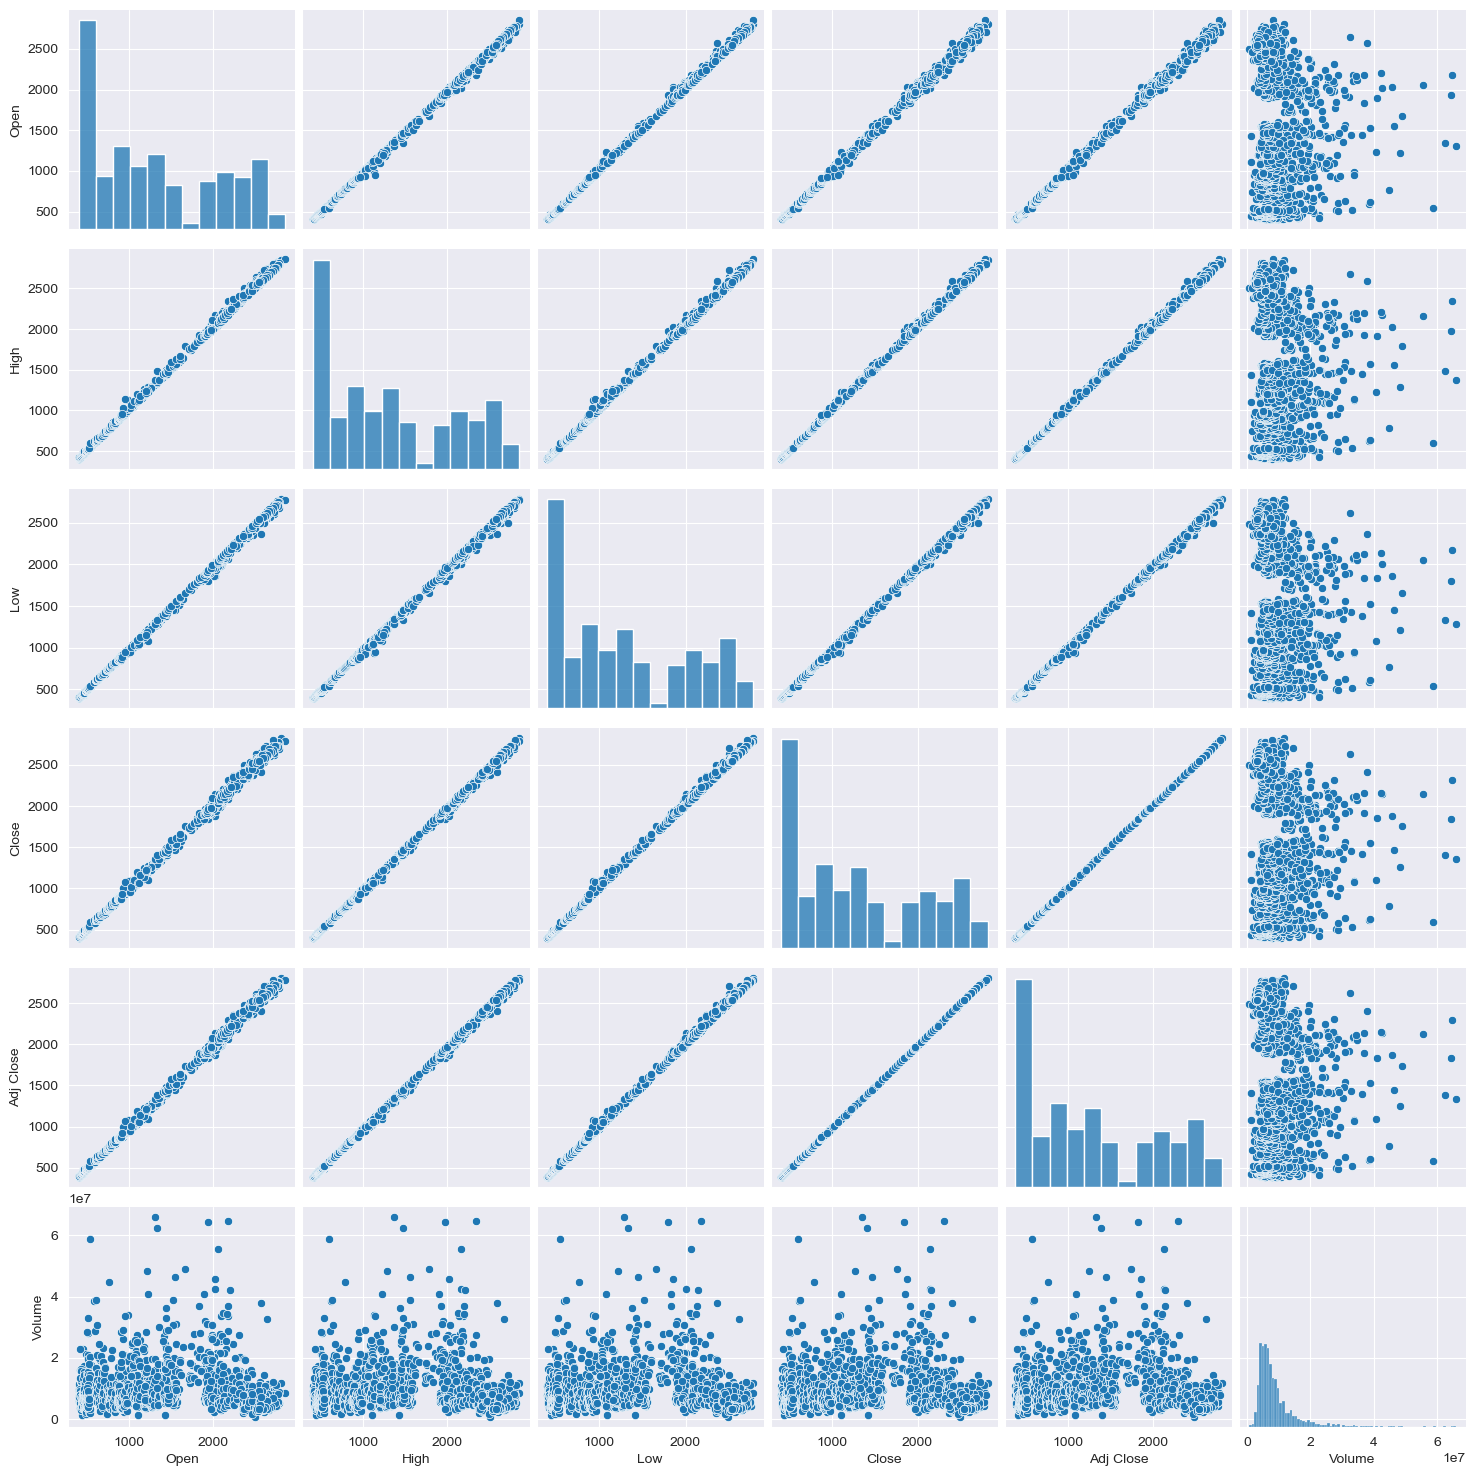

In [535]:
sns.set_style(style ='darkgrid')
sns.pairplot(corr_df)
plt.show()

### Augmented Dickey Fuller Test (ADF) Function Definition

In [97]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

    if dftest[1]> 0.05:
        print('Data is Non- Stationary')
    else:
        print('Data is Stationary')

### Graphical EDA of Stock Market Data

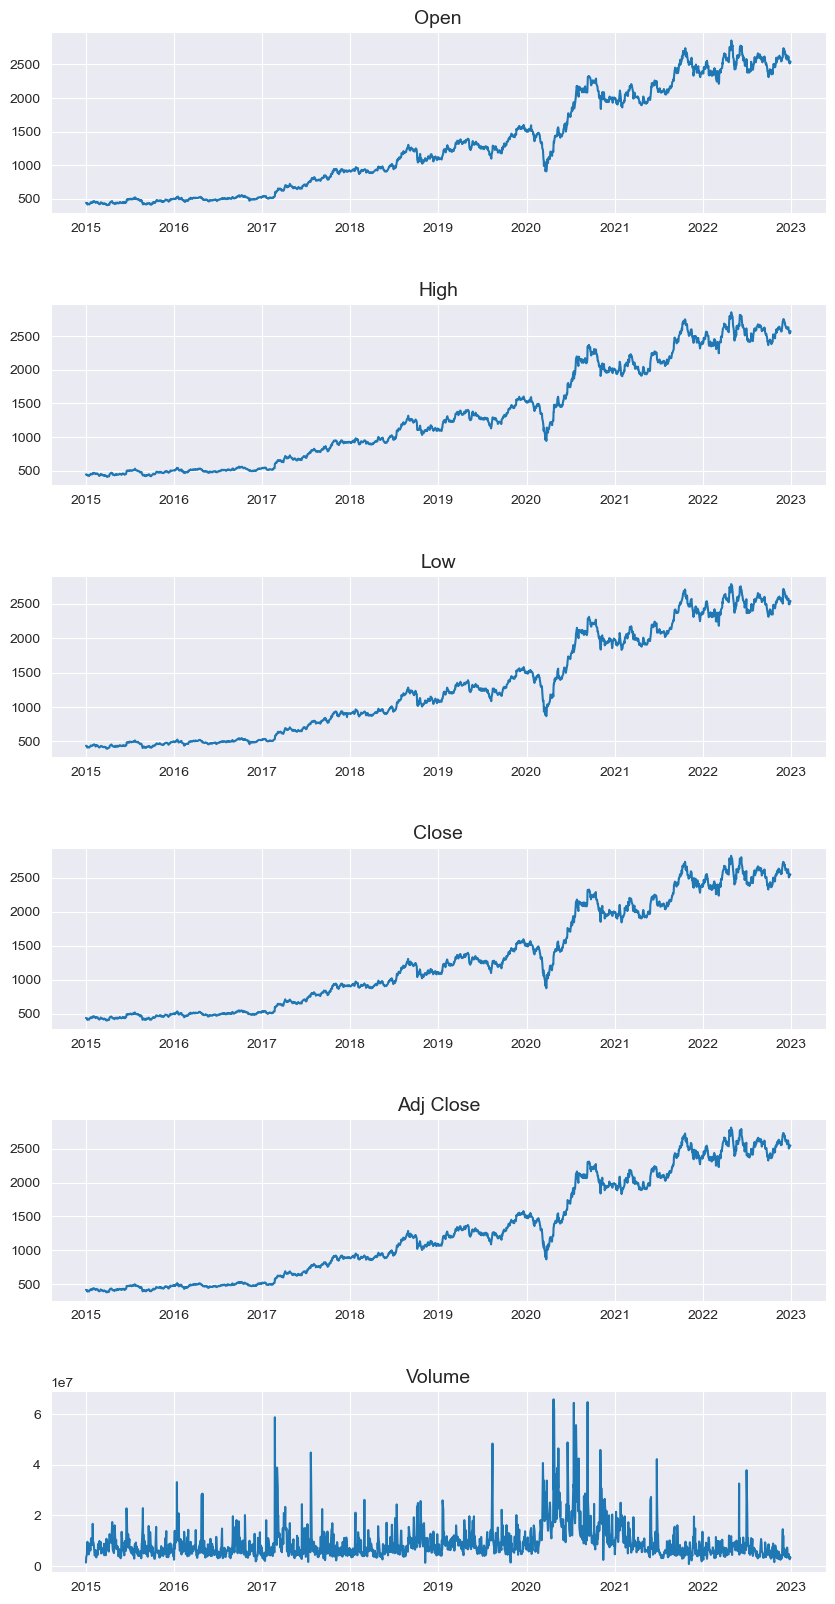

In [562]:
fig, ax = plt.subplots(6, figsize =  (10,20))
columns = ['Open', 'High', 'Low', 'Close', 'Adj Close','Volume']
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for i in range(0,6):
    ax[i].plot(stock['Date'],stock[columns[i]])
    ax[i].set_title(columns[i], fontsize = 14)

#### Closing stock price decomposition plot

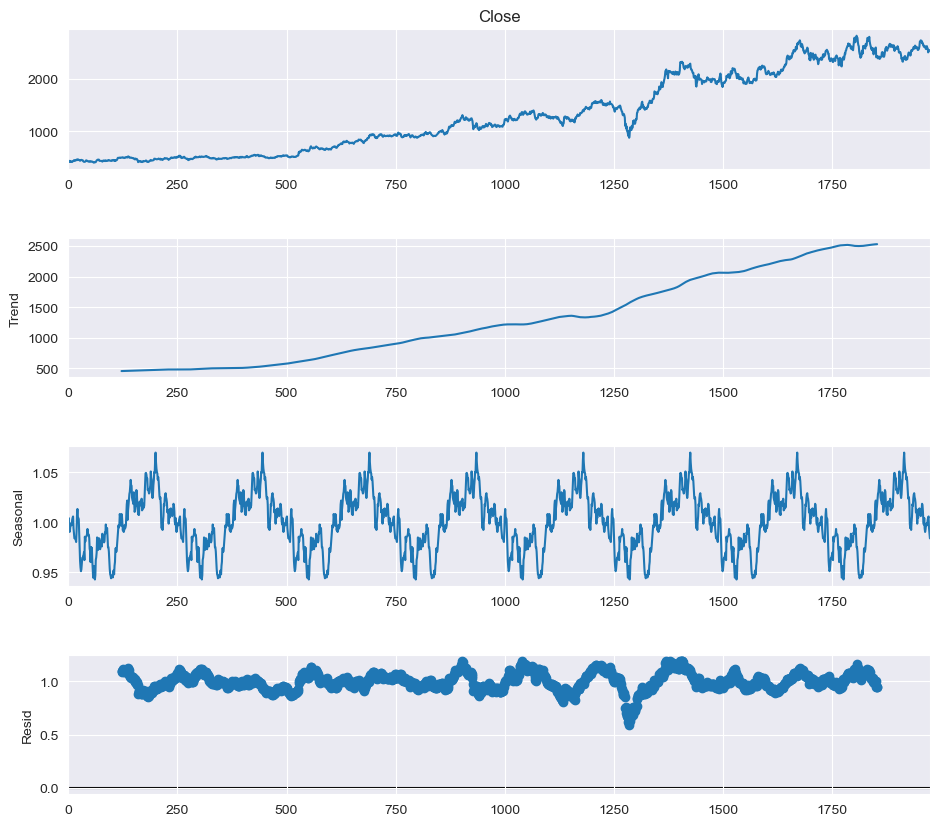

In [563]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_close_mul = seasonal_decompose(stock['Close'],period=245, model = 'multiplicative')
fig = decompose_close_mul.plot()
fig.set_size_inches((10, 9))

#### Variation in closing price in each year 

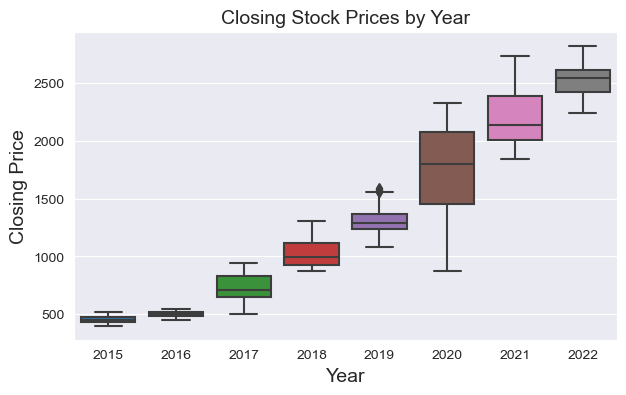

In [564]:
plt.figure(figsize = (7,4))
sns.boxplot(x='Year', y='Close', data=stock)
plt.title('Closing Stock Prices by Year',fontsize = 14)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Closing Price',fontsize = 14)
plt.show()

#### Volume Variation

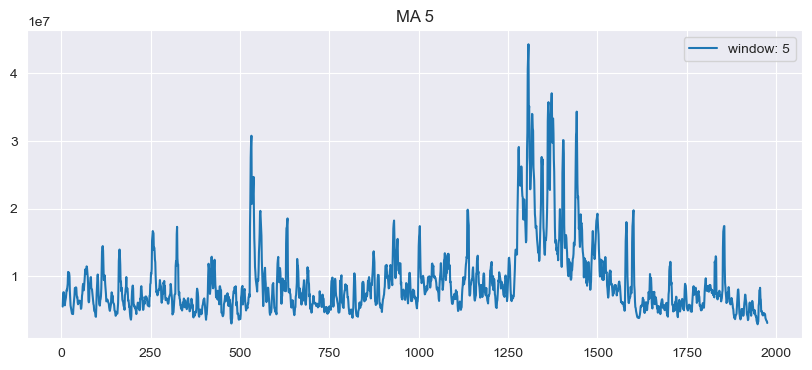

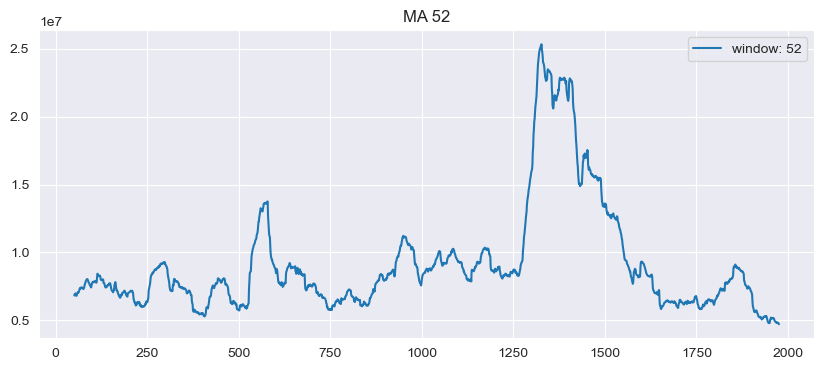

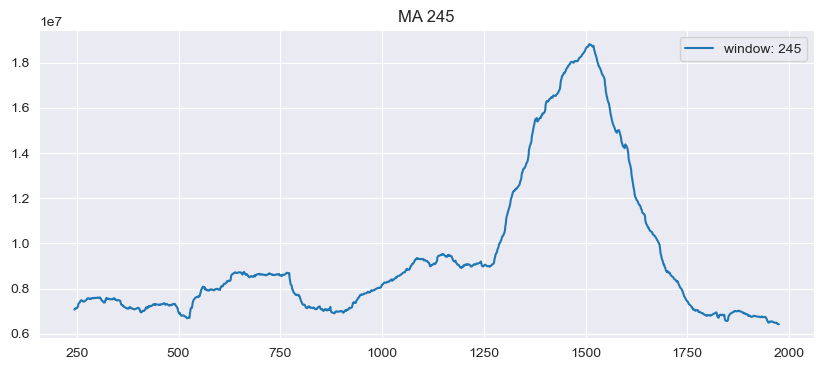

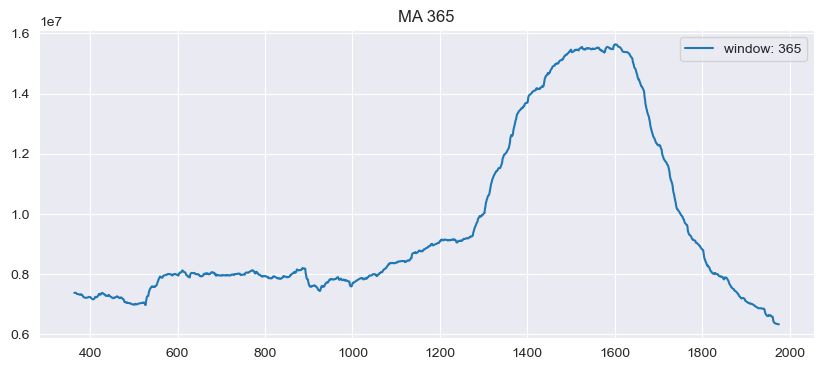

In [565]:
# Find moving average
for i in [5,52,245,365]:
    plt.figure(figsize=(10,4))
    stock["Volume"].rolling(i).mean().plot(label='window: '+str(i))
    plt.title("MA "+str(i))
    plt.legend(loc='best')
    plt.show()

#### There has been a sudden increase in the volume. We find the time of this increase 

In [566]:
stock.iloc[stock['Volume'].idxmax()]

Date         2020-04-22 00:00:00
Year                        2020
Month                          4
Day                           22
Open                     1307.61
High                      1371.9
Low                      1287.79
Close                     1350.8
Adj Close                 1337.4
Volume                  65848350
Name: 1303, dtype: object

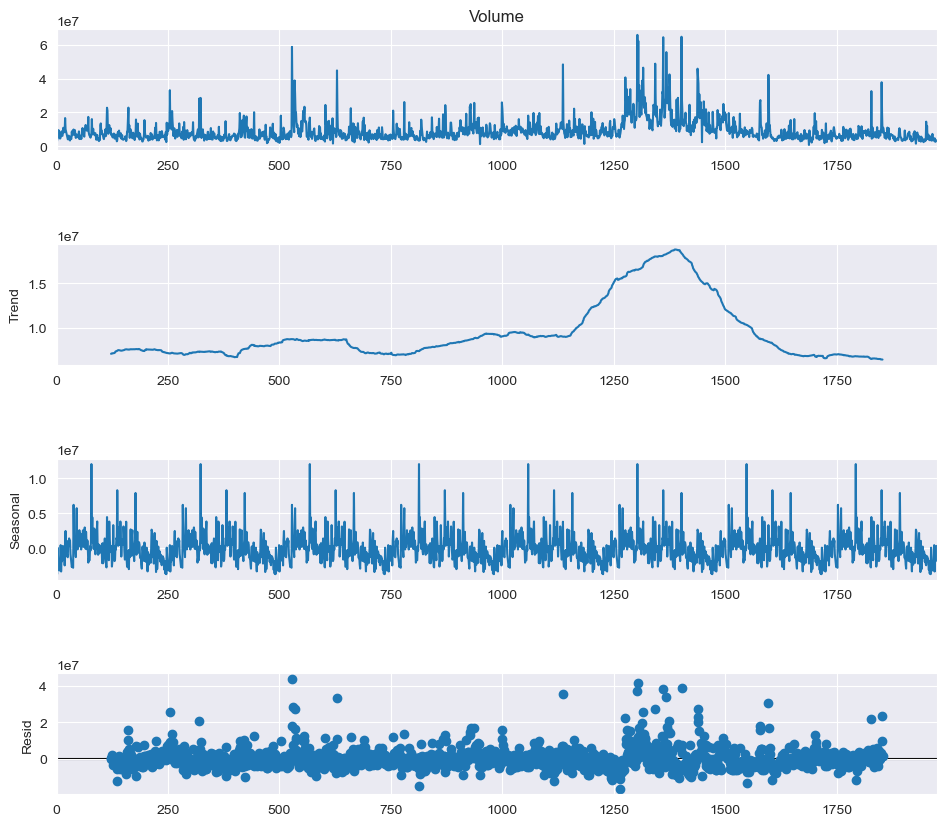

In [567]:
decompose_volume = seasonal_decompose(stock['Volume'],period=245, model = 'additive')
fig = decompose_volume.plot()
fig.set_size_inches((10, 9))

#### A look at closing price and volume compared by Year

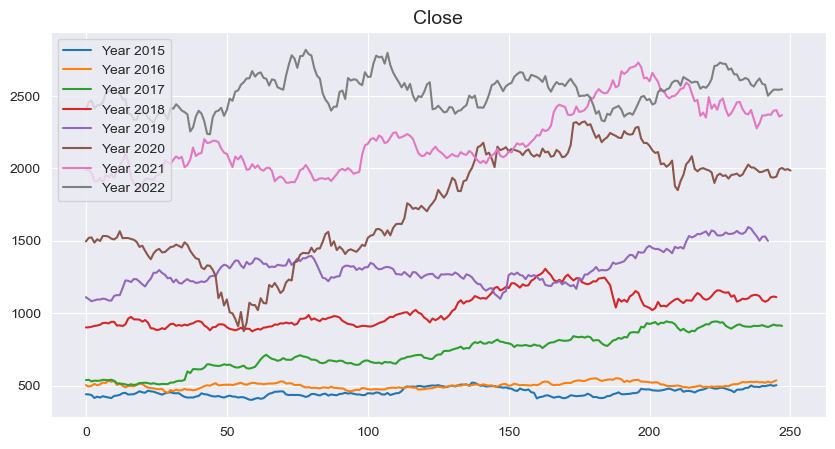

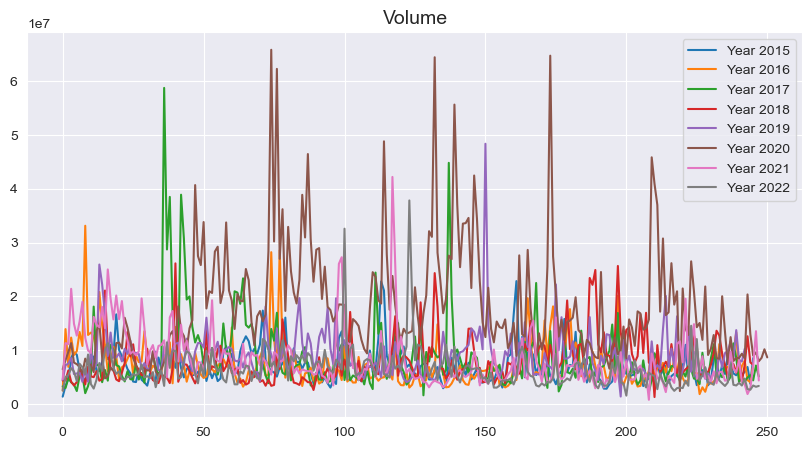

In [568]:
columns = ['Close','Volume']
for j in range (len(columns)):
    fig = plt.figure(figsize = (10,5))
    for i in range(start.year,end.year+1):
        data = stock.loc[stock['Year'] == i][columns[j]]
        plt.plot(data.reset_index(drop = True),label = ('Year '+str(i)))
    plt.legend(loc = 'best')
    plt.title(columns[j], fontsize = 14)
    plt.show()

#### Moving average of closing price and volume compared by Year

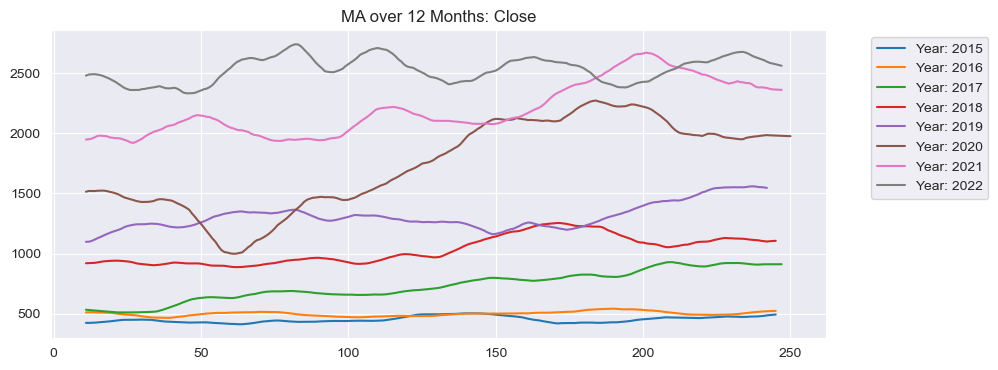

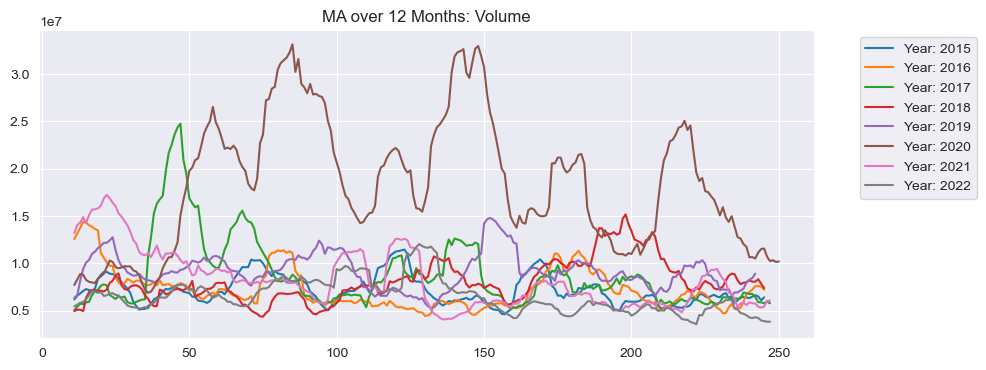

In [570]:
columns = ['Close','Volume']
for j in range (len(columns)):    
    plt.figure(figsize=(10,4))
    for i in range(start.year,end.year +1):
        data_ma = stock.loc[stock['Year'] == i][columns[j]].reset_index(drop = True)   
        data_ma.rolling(12).mean().plot(label='Year: '+str(i))
    plt.title("MA over 12 Months: " + columns[j] )
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    plt.show()

#### Largest Variation in stock closing price has been in 2022

#### How the average closing price and volume have changed over the years 

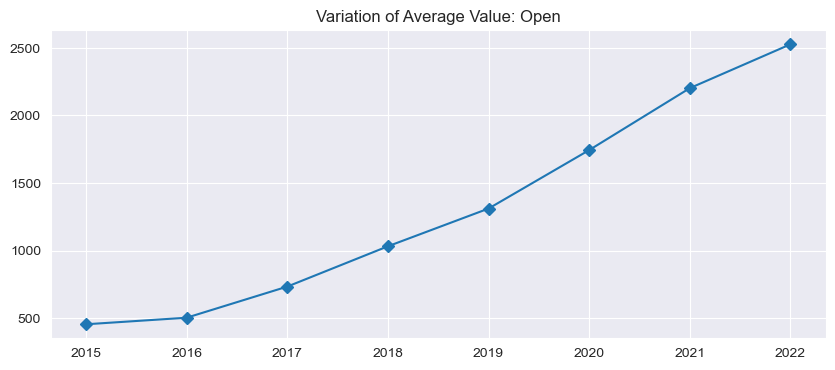

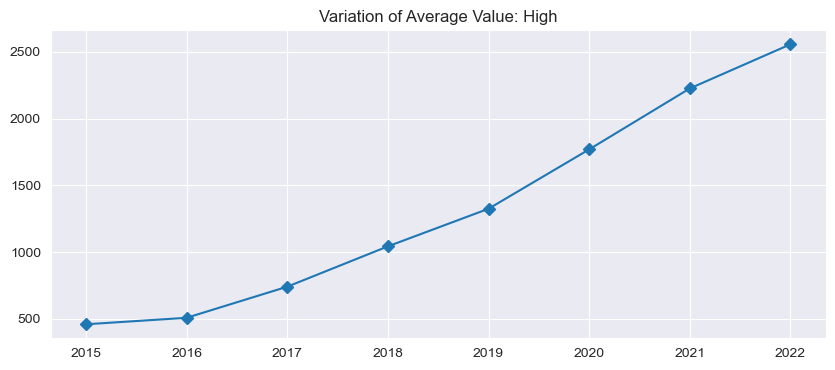

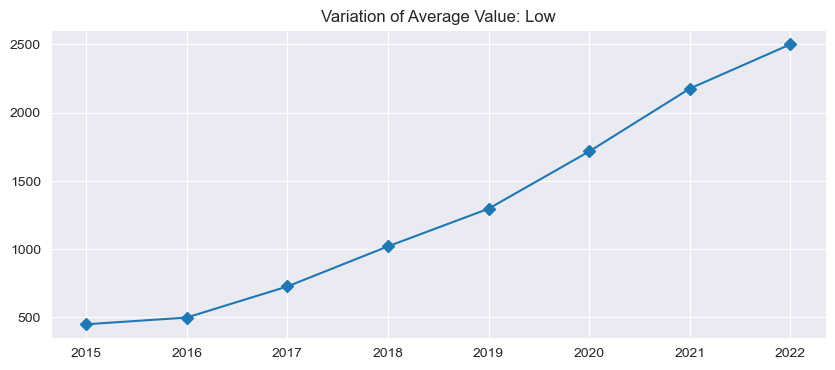

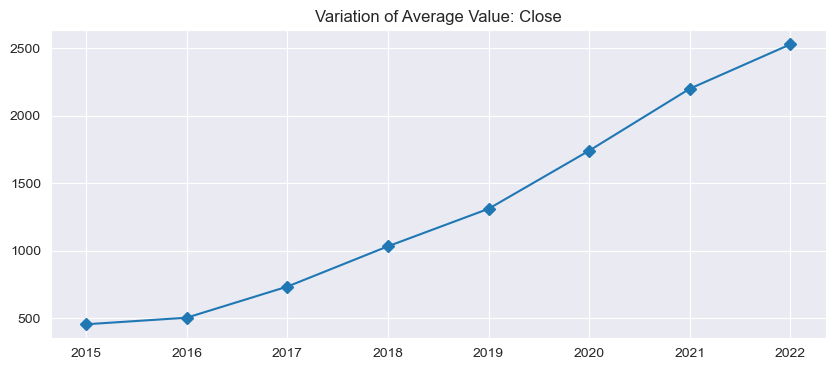

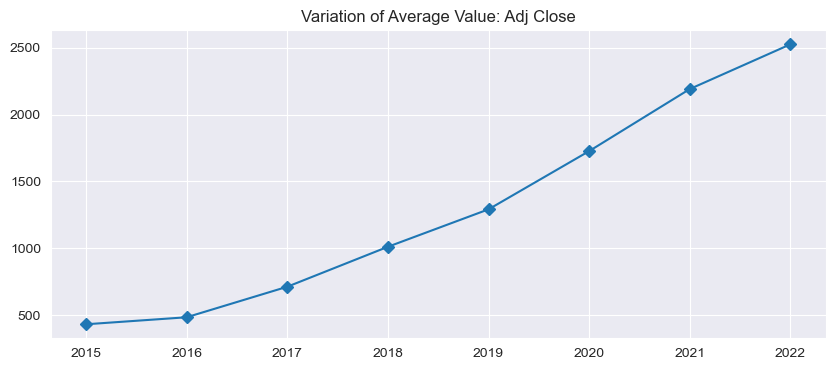

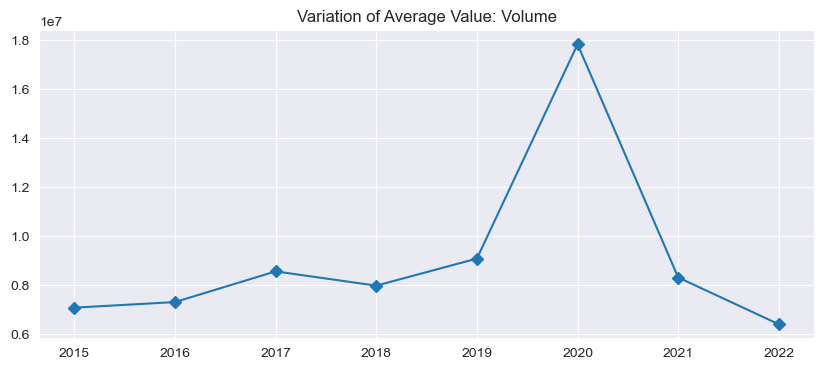

In [571]:
columns = ['Open', 'High', 'Low', 'Close', 'Adj Close','Volume']
for j in range (len(columns)):
    data_avg = list()
    plt.figure(figsize=(10,4))
    for i in range(start.year,end.year +1):
        data_avg.append(stock.loc[stock['Year'] == i][columns[j]].mean())   
    plt.plot(list(range(start.year,end.year +1)),data_avg, marker='D')
    plt.title("Variation of Average Value: " + columns[j] )
    plt.show()

#### There's a sudden increase in the volume of stocks traded in 2022. And then a drop. 

#### Variation of the difference in Opening and Closing price over the years

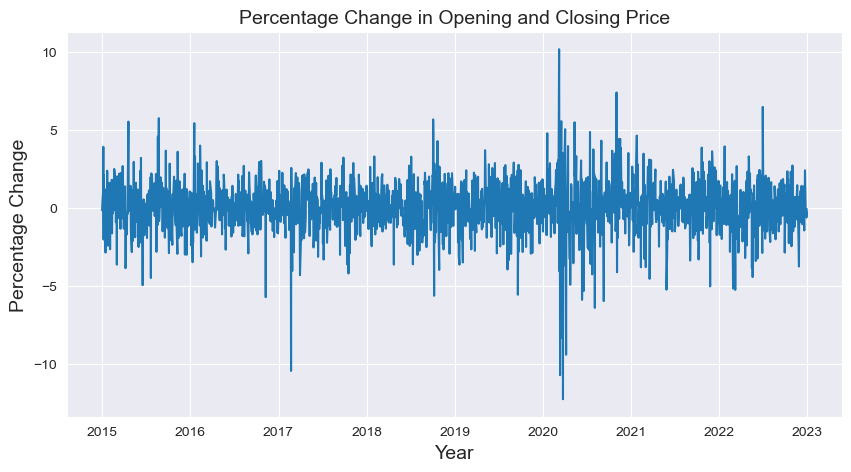

In [572]:
plt.figure(figsize = (10,5))
change = (stock['Open']-stock['Close'])/stock['Open']*100
plt.plot(stock['Date'],change)
plt.title('Percentage Change in Opening and Closing Price', fontsize = 14)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Percentage Change',fontsize = 14)
plt.show()

#### Max Gain  

In [573]:
change.max()

10.152961958955073

In [574]:
stock.iloc[change.idxmax()]

Date         2020-03-09 00:00:00
Year                        2020
Month                          3
Day                            9
Open                     1228.41
High                     1229.35
Low                      1084.72
Close                    1103.69
Adj Close                1092.74
Volume                  40698294
Name: 1276, dtype: object

#### Max Loss

In [575]:
change.min()

-12.290128305839216

In [576]:
stock.iloc[change.idxmin()]

Date         2020-03-25 00:00:00
Year                        2020
Month                          3
Day                           25
Open                      954.75
High                     1140.74
Low                       954.21
Close                    1072.09
Adj Close                1061.46
Volume                  33749620
Name: 1287, dtype: object

## Augmented Dickey Fuller Test for Stock Market Data 

In [578]:
columns = ['Open', 'High', 'Low', 'Close', 'Adj Close','Volume']
for i in columns:
    adf_test(stock[i])
    print('The above are the results for:',i,'\n')

Results of Dickey-Fuller Test:
Test Statistic                   -0.432530
p-value                           0.904524
#Lags Used                        0.000000
Number of Observations Used    1975.000000
Critical Value (1%)              -3.433665
Critical Value (5%)              -2.863005
Critical Value (10%)             -2.567550
dtype: float64
Data is Non- Stationary
The above are the results for: Open 

Results of Dickey-Fuller Test:
Test Statistic                   -0.388938
p-value                           0.911929
#Lags Used                        1.000000
Number of Observations Used    1974.000000
Critical Value (1%)              -3.433667
Critical Value (5%)              -2.863005
Critical Value (10%)             -2.567550
dtype: float64
Data is Non- Stationary
The above are the results for: High 

Results of Dickey-Fuller Test:
Test Statistic                   -0.361918
p-value                           0.916266
#Lags Used                       26.000000
Number of Observations

#### We see that stock market prices- open, high, low, close, adj close are all non-staionary data 
#### Volume is the only stationary data

## ARIMA Model Generation

### Visualization of Differencing and Transforming the data to make it Stationary

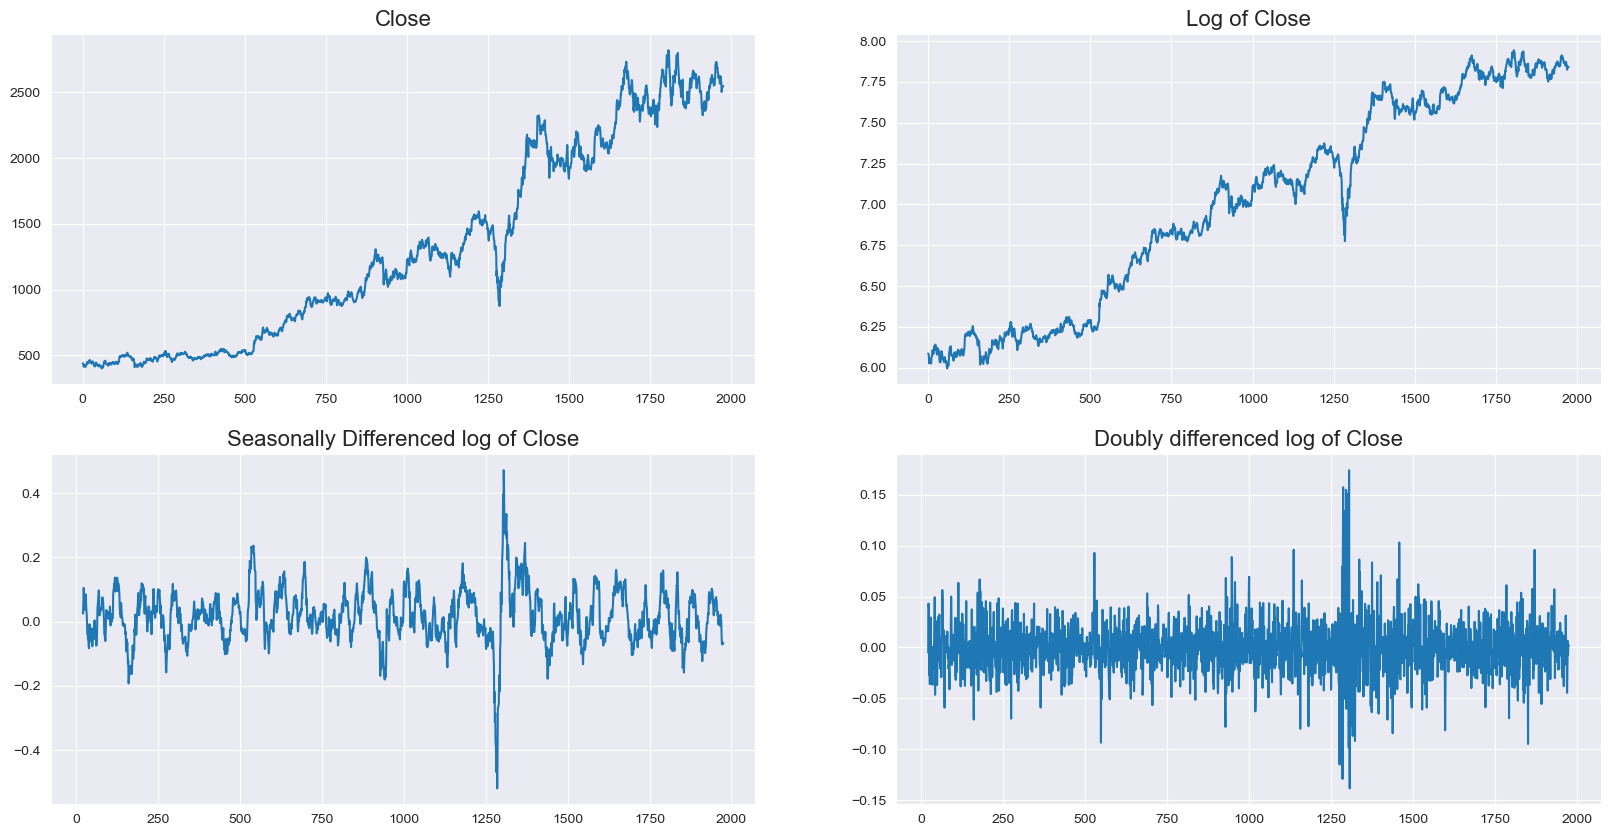

In [579]:
close_log = pd.DataFrame() 
close_log_diff = pd.DataFrame() 
close_log_diff_double = pd.DataFrame()
from scipy import stats

close_log['Close'] = np.log(stock['Close']) # Calculate log of Close 
close_log_diff['Close'] = (close_log['Close'].diff(periods = 20)).dropna() # Seasonal Differencing
close_log_diff_double['Close'] = (close_log_diff['Close'].diff(periods = 1)).dropna() # First difference of the seasinay difference to nake data staionary

fig, ax = plt.subplots(2,2, figsize=(20, 10))
ax[0,0].plot(stock['Close'])
ax[0,0].set_title('Close', fontsize = 16)

ax[0,1].plot(close_log)
ax[0,1].set_title('Log of Close', fontsize = 16)

ax[1,0].plot(close_log_diff)
ax[1,0].set_title('Seasonally Differenced log of Close', fontsize = 16)

ax[1,1].plot(close_log_diff_double)
ax[1,1].set_title('Doubly differenced log of Close', fontsize = 16)

plt.show()

### Calculating log values of the Data 

In [581]:
stock_log = pd.DataFrame()
stock_log_diff = pd.DataFrame()

col = stock.columns
col = col.drop(['Date','Year', 'Month', 'Day', 'Volume'])

for i in col:
    stock_log[i] = np.log(stock[i])

### Differencing Log Values using Lag 30

In [582]:
lag = 30
for i in col:    
#     stock_log_diff = ((stock_log.diff(periods = 30)).diff(periods =1)).dropna() # sesonal and doubly
    stock_log_diff = stock_log.diff(periods = lag).dropna() 

#### Augmented Dickey Fuller Test on the Differenced and Transformed Data to check for Stationarity

In [583]:
for i in stock_log_diff.columns:
    adf_test(stock_log_diff[i])
    print('The above are the results for:',i,'\n')

Results of Dickey-Fuller Test:
Test Statistic                -7.794700e+00
p-value                        7.773570e-12
#Lags Used                     1.400000e+01
Number of Observations Used    1.931000e+03
Critical Value (1%)           -3.433741e+00
Critical Value (5%)           -2.863038e+00
Critical Value (10%)          -2.567567e+00
dtype: float64
Data is Stationary
The above are the results for: Open 

Results of Dickey-Fuller Test:
Test Statistic                -8.868586e+00
p-value                        1.418145e-14
#Lags Used                     2.600000e+01
Number of Observations Used    1.919000e+03
Critical Value (1%)           -3.433762e+00
Critical Value (5%)           -2.863047e+00
Critical Value (10%)          -2.567572e+00
dtype: float64
Data is Stationary
The above are the results for: High 

Results of Dickey-Fuller Test:
Test Statistic                -9.013552e+00
p-value                        6.034920e-15
#Lags Used                     2.600000e+01
Number of Obser

#### All the data is now stationary 

### ACF and PACF Plots

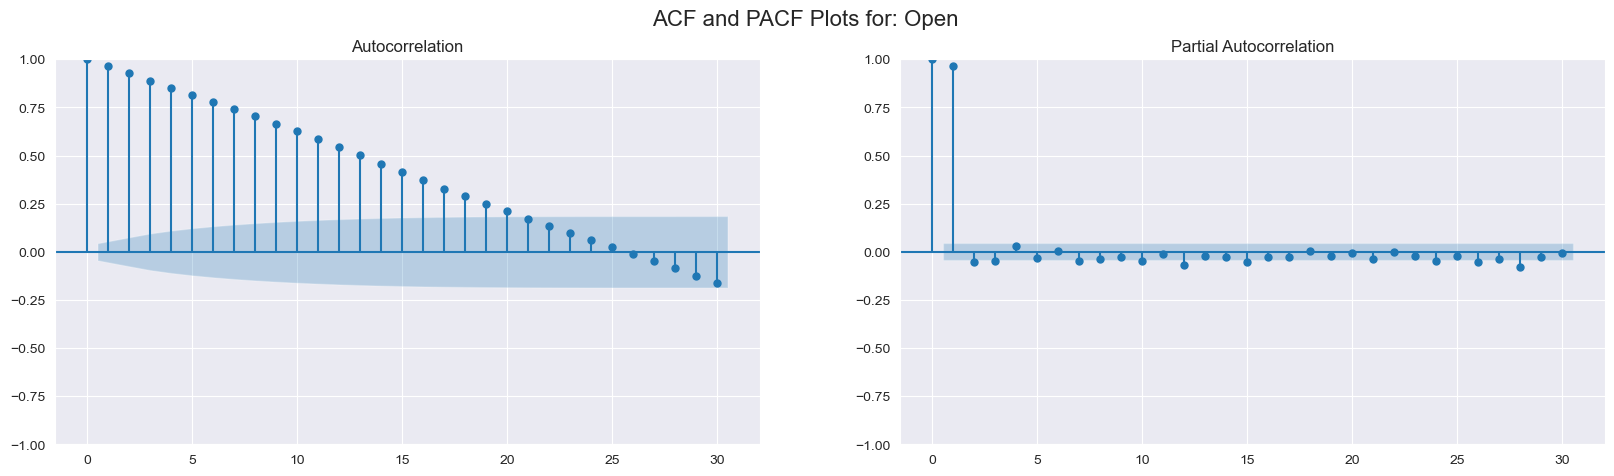

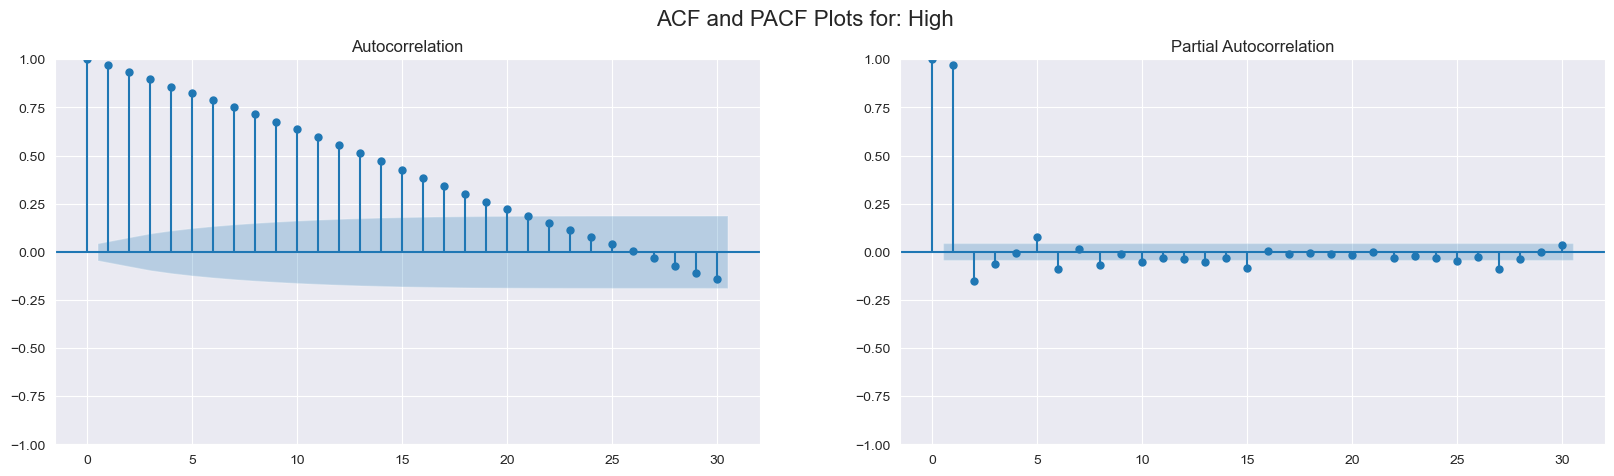

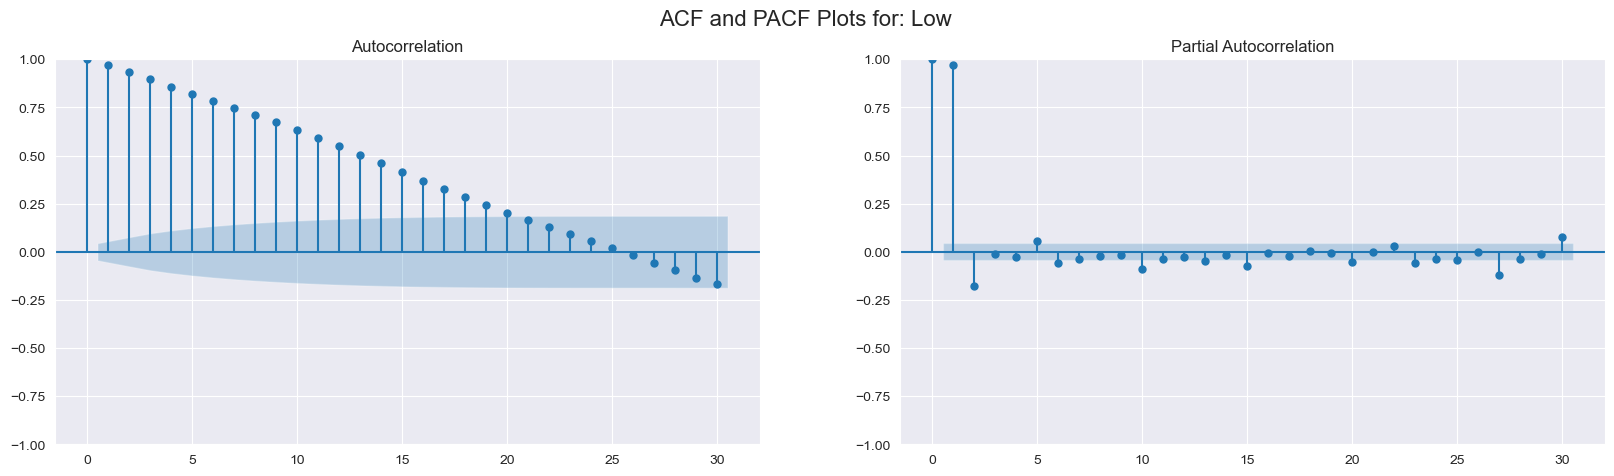

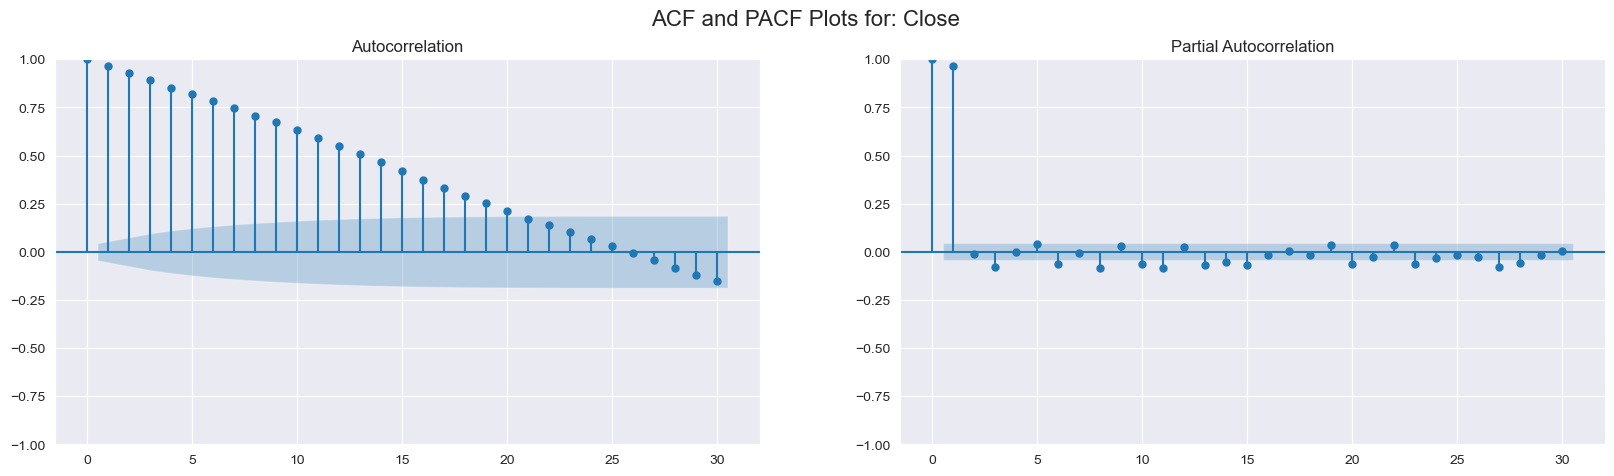

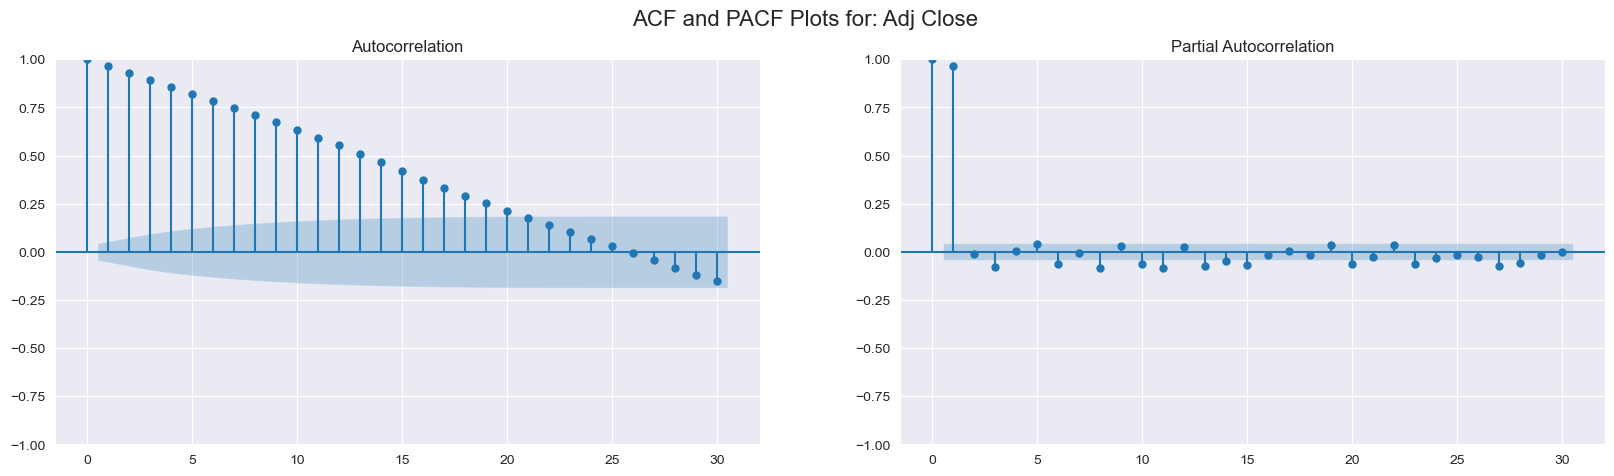

In [584]:
import statsmodels.graphics.tsaplots as tsa_plots
columns = stock_log_diff.columns
for i in columns:
    fig, ax = plt.subplots(1,2, figsize=(20, 5))
    tsa_plots.plot_acf(stock_log_diff[i],lags=30, ax = ax[0])
    tsa_plots.plot_pacf(stock_log_diff[i],lags= 30, ax = ax[1])
    fig.suptitle('ACF and PACF Plots for: %s'%i, fontsize = 16 )
    plt.show()

### Auto ARIMA to find the order for ARIMA model

In [586]:
import warnings
warnings.filterwarnings("ignore")

In [585]:
# pip install pmdarima

In [587]:
from pmdarima import auto_arima

col = ['Open', 'High', 'Low', 'Close', 'Adj Close']
order_list = list()
aic_list = list()

for i in col:
    model_stock_log_diff = auto_arima(stock_log_diff[i], trace = True, suppress_warning = True) # for differenced log values
    aic_list.append(model_stock_log_diff.aic())  # assign best AIC value to corresponding column  
    order_list.append(model_stock_log_diff.order) # assign orderof best AIC value to corresponding column 
#     order_df[i]= model_stock_log_diff.get_params().get("order") # cal also be written this way
#     model_stock_log_diff.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-8620.616, Time=2.90 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-3426.967, Time=0.48 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-8613.706, Time=0.57 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-5421.762, Time=1.96 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-3287.932, Time=0.14 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-8619.369, Time=0.77 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-8621.876, Time=0.70 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-8616.466, Time=0.69 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-8616.943, Time=0.63 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-8619.232, Time=1.07 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-8619.015, Time=0.94 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-8612.215, Time=2.52 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-8625.849, Time=0.20 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-8615.772, Time=0.46 sec
 ARIMA(2,0,0)(0,0,0

In [588]:
# Arima Order for the columns - Open, High, Low, Close and Adj CLose
order_list

[(2, 0, 1), (2, 0, 3), (2, 0, 0), (1, 0, 2), (1, 0, 2)]

In [589]:
# AIC for the columns - Open, High, Low, Close and Adj CLose using the above Arima order
aic_list

[-8625.849354939692,
 -9217.063783742888,
 -9012.289517921523,
 -8651.485078737336,
 -8647.440464055753]

### Apply the order generated by Auto ARIMA to each of the features

#### 1. Define Evaluation Metric MAPE (Mean Absolute Percentage Error)

In [590]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

#### 2. Define ARIMA model function to find RMSE, MAPE and Predictions

In [591]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt 

def evaluate_arima_model(X,arima_order):
#     split = int(len(X)*0.8)
#     train, test = X[0:split], X[split:]
    split = -30
    train, test = X[0:split], X[split:] # Using last 'split' values as test data
    history = [i for i in train]
    pred = list()
    
    for k in range(len(test)):
        model = ARIMA(history, order = arima_order).fit()
        yhat = model.forecast()[0]
        pred.append(yhat)
        history.append(test[k])
        
    rmse = sqrt(mean_squared_error(test, pred))
    mape = MAPE(pred, test)
    return[rmse, mape,pred]

#### 3. Run the ARIMA model for each Feature in the dataset

In [592]:
col = ['Open', 'High', 'Low', 'Close', 'Adj Close']
rmse_result = list()
mape_result = list()
predictions = pd.DataFrame()

for i in col:
    model_result = evaluate_arima_model(stock_log_diff[i].values,order_list[col.index(i)])
    rmse_result.append(np.round(model_result[0],4))
    mape_result.append(np.round(model_result[1],4))
    predictions[i] = np.round(model_result[2],4)

#### 4. Plot graphs to compare predictions with test values 

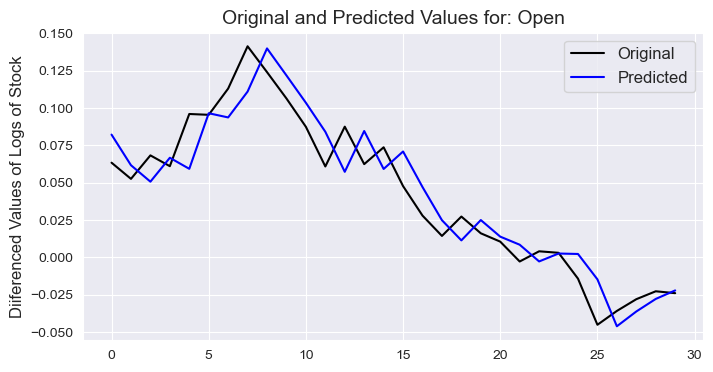

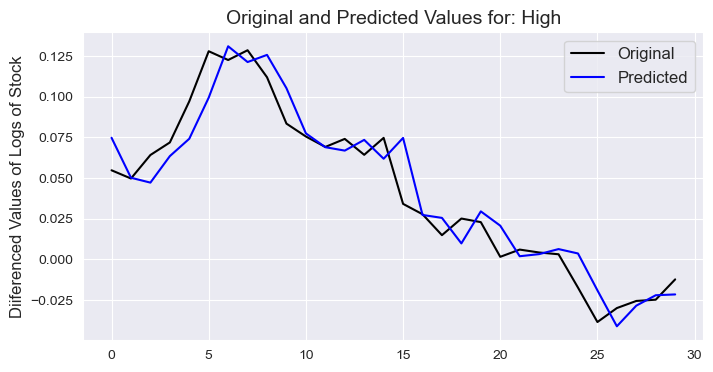

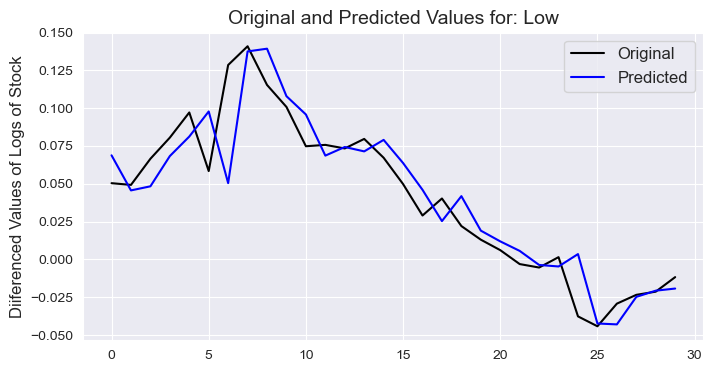

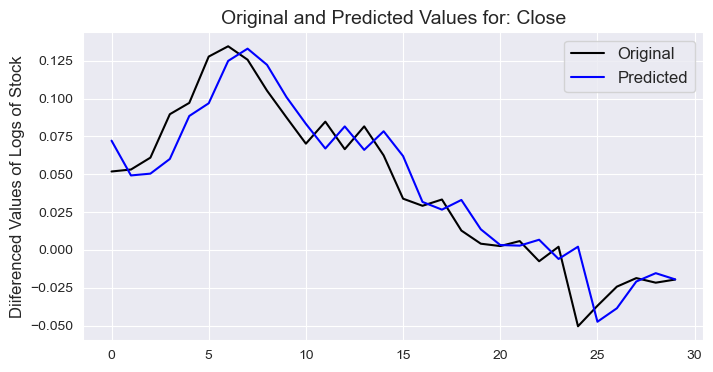

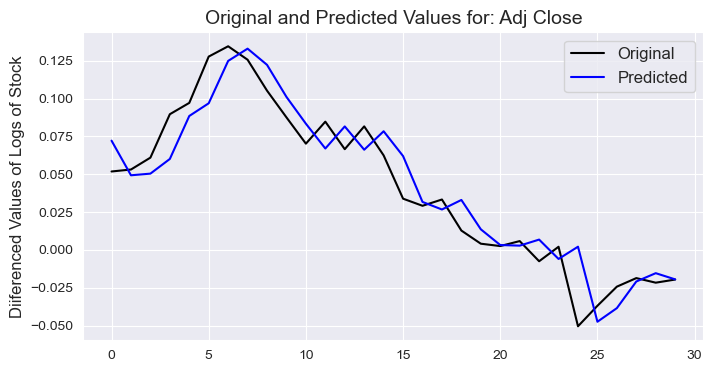

In [593]:
col = ['Open', 'High', 'Low', 'Close', 'Adj Close']

for i in col:
    plt.figure(figsize=(8,4))
    plt.plot(stock_log_diff[i].iloc[-len(predictions):].reset_index(drop = True), color = 'black', label = 'Original')
    plt.plot(predictions[i], color = 'blue', label = 'Predicted')
    plt.ylabel('Diiferenced Values of Logs of Stock', fontsize = 12)
    plt.title('Original and Predicted Values for: %s'%i, fontsize = 14)
    plt.legend(loc = 'best', fontsize = 12)
    plt.show()

#### 5. Forecasting for a Day, a Week and a Month  

#### 5.1 Define an ARIMA model function to forecast stock prices

In [594]:
def forecast_arima_model(X,arima_order,forecast_days):

    history = [i for i in X]
    forecast = list()
    
    for k in range(forecast_days):
        model = ARIMA(history, order = arima_order).fit()
        yhat = model.forecast()[0]
        forecast.append(yhat)
        history.append(forecast[k])
        
    return forecast

In [169]:
col = ['Open', 'High', 'Low', 'Close', 'Adj Close']

forecast_df = pd.DataFrame()

days = 30
for i in col:
    result_forecast = forecast_arima_model(stock_log_diff[i].values,order_list[col.index(i)], days)
    forecast_df[i] = result_forecast
        
# # This also provides same result
# for i in col:
#     model = ARIMA(stock_log_diff[i].values,order = order_list[col.index(i)]).fit()
#     fore_arima = model.forecast(steps = days)
#     forecast_df[i] = fore_arima    
    

#### 6. Reversing the Differenced Log Values of Predictions and Forecast

#### 6.1 Reversing differencing and log for Predictioons

In [595]:
col = ['Open', 'High', 'Low', 'Close', 'Adj Close']

temp_log = stock_log[['Open', 'High', 'Low', 'Close', 'Adj Close']] # Copy only values of these columns
predictions_indexed = pd.DataFrame()

original_stock_log = temp_log.iloc[-len(predictions)-lag:-lag] # required for reverse differencing
# there is a lag of 5, so in differencing last 5 values of stock_log will not be used in generating stock_log_diff
# last 10 values of stock_log_diff are used for prediction, there fore the stock_log used in stock_log_diff starts at (-10-5)

# Reverse Differencing of predictions 
for i in col:
    rev_diff_temp = list() # temporarily store reverse differenced values
    for j in range(len(predictions)):
        rev_diff_temp.append(predictions[i].iloc [j]+ original_stock_log[i].iloc [j])
    predictions_indexed[i]= rev_diff_temp 

# Reverse Log of predictions 
predictions_indexed = np.exp(predictions_indexed)  

# Re-indexing predictions 
indexing = pd.Index(range(len(stock)-len(predictions),len(stock)))
predictions_indexed.set_index(indexing, inplace = True)

# Adding Date Column to predictions 
date_df = pd.DataFrame()
date_df['Date'] = stock['Date'].iloc[-len(predictions):] 
predictions_indexed.insert(0,'Date', date_df['Date'])

#### 6.1.2 RMSE and MAPE of the Predicted Values 

In [596]:
col = ['Open', 'High', 'Low', 'Close', 'Adj Close']
rmse_list = list()
mape_list = list()

for i in col:
    rmse_list.append(sqrt(mean_squared_error(stock[i].iloc[-len(predictions):], predictions_indexed[i])))
    mape_list.append(MAPE(predictions_indexed[i], stock[i].iloc[-len(predictions):]))

error_df = pd.DataFrame({'RMSE': np.round(rmse_list,2), 'MAPE' : np.round(mape_list,2)}, index = ['Open', 'High', 'Low', 'Close', 'Adj Close'])
print('\033[1m'+ 'RMSE and MAPE for Predictions using ARIMA Model')
error_df

RMSE and MAPE for Predictions using ARIMA Model


RMSE  MAPE
Open       46.08  1.49
High       39.56  1.16
Low        54.53  1.43
Close      45.24  1.36
Adj Close  45.24  1.36

#### 6.2 Reversing differencing and log for Forecast

In [597]:
col = ['Open', 'High', 'Low', 'Close', 'Adj Close']

# log_add = stock_log[['Open', 'High', 'Low', 'Close', 'Adj Close']].iloc[-5:] # log of original data
forecast_indexed = pd.DataFrame()

# Reverse Differencing of Forecast
for i in col:
    add_term = [k for k in stock_log[i].iloc[-lag:]] #lag is 5
    rev_diff_fc = list()
    for j in range(len(forecast_df)):        
        rev_diff_fc.append(forecast_df[i].iloc[j]+ add_term[j]) # reversed difference of forecast
        add_term.append(rev_diff_fc[j])
    forecast_indexed[i] = rev_diff_fc
    
# Reverse Log of Forecast 
forecast_indexed = np.exp(forecast_indexed)

# Re-indexing Forecast 
indexing_fc = pd.Index(range(len(stock),len(stock)+len(forecast_df)))
forecast_indexed.set_index(indexing_fc, inplace = True)

# Adding Date Column to predictions 
date_df_fc = pd.DataFrame()
date_df_fc['Date'] = pd.date_range(stock['Date'].iloc[-1], periods = days+1, freq = 'B')
date_df_fc.drop(date_df_fc.index[0], inplace = True) # includes start date, so we drop it
date_df_fc.set_index(indexing_fc, inplace = True) # reset the index to start after the last date of stock dataframe
forecast_indexed.insert(0,'Date', date_df_fc['Date'])

#### 6.2.1 Forecast Values for Different Periods of Time

In [598]:
print('\033[1m'+ 'Forecast for One Day:')
forecast_indexed.head(1)

Forecast for One Day:


Date         Open         High          Low       Close  \
1976 2023-01-02  2528.828283  2562.526068  2520.992533  2504.98393   

        Adj Close  
1976  2505.044804

In [599]:
print('\033[1m'+ 'Forecast for One Week:')
forecast_indexed.head(5)

Forecast for One Week:


Date         Open         High          Low        Close  \
1976 2023-01-02  2528.828283  2562.526068  2520.992533  2504.983930   
1977 2023-01-03  2489.380998  2549.513488  2518.836174  2523.717457   
1978 2023-01-04  2521.823845  2563.762995  2538.184540  2520.490589   
1979 2023-01-05  2517.099741  2582.324677  2537.613377  2546.717636   
1980 2023-01-06  2544.087576  2617.210458  2574.716049  2589.106427   

        Adj Close  
1976  2505.044804  
1977  2523.824607  
1978  2520.646396  
1979  2546.923533  
1980  2589.364159

In [600]:
print('\033[1m'+ 'Forecast for One Month:')
forecast_indexed

Forecast for One Month:


Date         Open         High          Low        Close  \
1976 2023-01-02  2528.828283  2562.526068  2520.992533  2504.983930   
1977 2023-01-03  2489.380998  2549.513488  2518.836174  2523.717457   
1978 2023-01-04  2521.823845  2563.762995  2538.184540  2520.490589   
1979 2023-01-05  2517.099741  2582.324677  2537.613377  2546.717636   
1980 2023-01-06  2544.087576  2617.210458  2574.716049  2589.106427   
1981 2023-01-09  2568.341949  2716.233689  2497.951118  2682.413729   
1982 2023-01-10  2666.978489  2730.780160  2692.849178  2691.185512   
1983 2023-01-11  2680.786891  2747.732729  2700.131189  2714.208447   
1984 2023-01-12  2715.333701  2760.664269  2720.922495  2710.052759   
1985 2023-01-13  2707.470630  2756.664531  2708.336326  2712.591538   
1986 2023-01-16  2695.324499  2728.319124  2688.375315  2676.510021   
1987 2023-01-17  2653.235524  2711.072031  2673.887005  2687.587231   
1988 2023-01-18  2678.735559  2711.786014  2657.401061  2651.083926   
1989 2023-01-19  2657.937057  2684.062777  2657.692927  2652.859011   
1990 2023-01-20  2649.465188  2681.350520  2621.413254  2615.509764   
1991 2023-01-23  2594.205936  2646.297432  2606.557330  2622.260208   
1992 2023-01-24  2627.566946  2658.351353  2630.489708  2636.840141   
1993 2023-01-25  2656.549695  2666.473572  2636.799937  2629.816163   
1994 2023-01-26  2626.247166  2644.251006  2598.266258  2594.842098   
1995 2023-01-27  2598.719112  2649.985878  2587.056585  2584.278984   
1996 2023-01-30  2612.924584  2636.847492  2597.412881  2620.426317   
1997 2023-01-31  2619.775823  2660.826384  2598.343811  2645.237126   
1998 2023-02-01  2661.172755  2669.565199  2610.149522  2609.613350   
1999 2023-02-02  2641.375887  2642.369500  2602.184210  2604.768542   
2000 2023-02-03  2609.415613  2629.387054  2528.060216  2530.163291   
2001 2023-02-06  2563.566963  2581.508033  2529.559359  2553.983001   
2002 2023-02-07  2583.767091  2589.585425  2554.053609  2576.544344   
2003 2023-02-08  2594.657946  2591.845177  2561.653217  2577.887356   
2004 2023-02-09  2585.919142  2592.364401  2566.920553  2578.250456   
2005 2023-02-10  2608.289611  2622.047985  2583.937734  2583.670095   

        Adj Close  
1976  2505.044804  
1977  2523.824607  
1978  2520.646396  
1979  2546.923533  
1980  2589.364159  
1981  2682.729987  
1982  2691.551273  
1983  2714.625273  
1984  2710.515854  
1985  2713.101056  
1986  2677.057188  
1987  2688.180316  
1988  2651.711074  
1989  2653.527783  
1990  2616.208820  
1991  2622.999949  
1992  2637.622171  
1993  2630.633274  
1994  2595.684123  
1995  2585.152338  
1996  2621.346251  
1997  2646.199583  
1998  2610.595350  
1999  2605.780326  
2000  2531.175993  
2001  2555.034618  
2002  2577.634100  
2003  2579.005767  
2004  2579.396351  
2005  2584.845031

#### 7. Visualization of Forecast Values

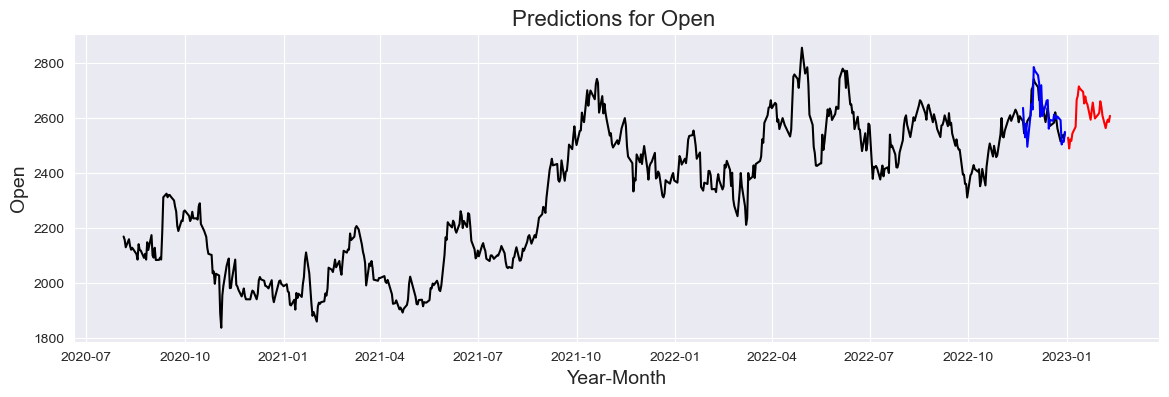

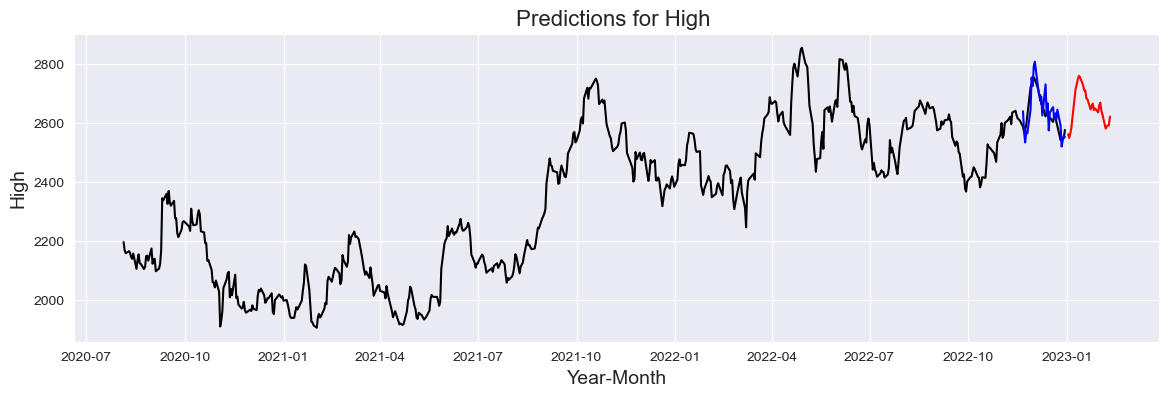

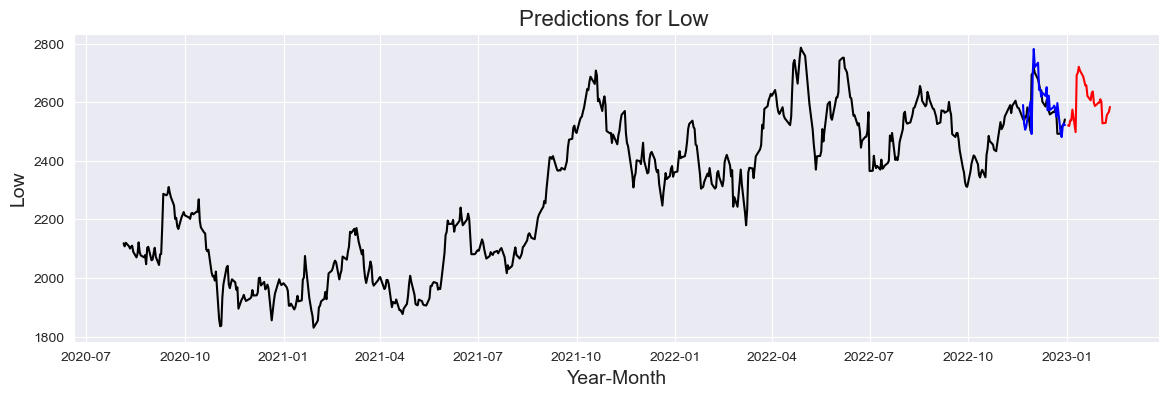

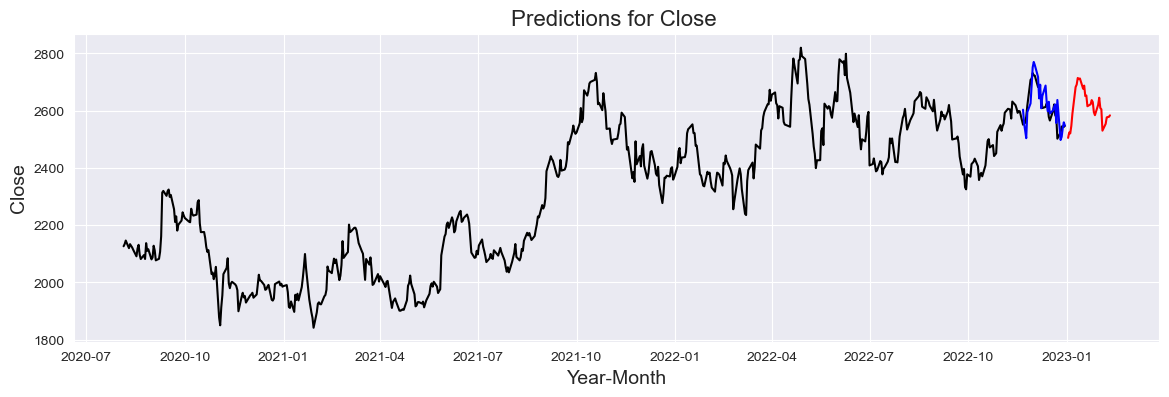

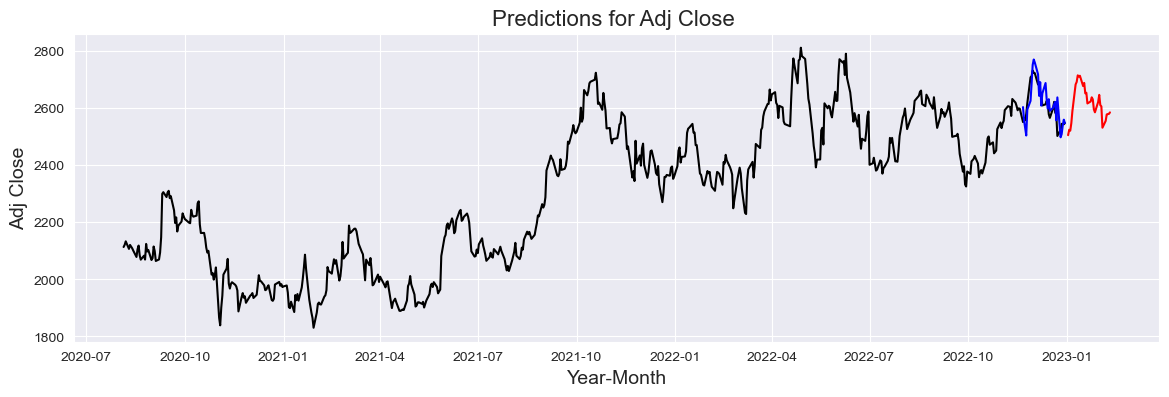

In [601]:
col = ['Open', 'High', 'Low', 'Close', 'Adj Close']

for i in col:
    plt.figure(figsize = (14,4))
    plt.plot(stock['Date'].iloc[-600:], stock[i].iloc[-600:], color = 'black')
    plt.plot(predictions_indexed['Date'], predictions_indexed[i], color = 'blue')
    plt.plot(forecast_indexed['Date'], forecast_indexed[i], color = 'red')
    plt.ylabel('%s'%i, fontsize = 14)
    plt.xlabel('Year-Month', fontsize = 14)
    plt.title('Predictions for %s '%i, fontsize = 16 )

## Holt Winter's Exponential Smoothing 

In [602]:
# Split the data into train and test sets
col = ['Open', 'High', 'Low', 'Close', 'Adj Close']
split = int(len(stock)*0.8)
train_stock = pd.DataFrame()
test_stock = pd.DataFrame()

for i in col:
    train_stock[i] = stock[i].iloc[0:split]
    test_stock[i] = stock[i].iloc[split:]

In [603]:
from statsmodels.tsa.holtwinters import  ExponentialSmoothing

rmse_result_hwe = list()
mape_result_hwe = list()
predictions_hwe = pd.DataFrame()
smoothing_df = pd.DataFrame()

alpha = np.arange(0.1,1,0.99/10) 
beta = np.arange(0.1,1,0.99/10)
delta = np.arange(0.1,1,0.99/10)


col = ['Open', 'High', 'Low', 'Close', 'Adj Close']

for k in col:
    best_score = float('inf')
    for i in alpha:
            for j in beta:
                for d in delta:
                    model_hwe =  ExponentialSmoothing(train_stock[k], damped_trend=True,
                                                      trend = 'add', 
                            seasonal = 'mul', seasonal_periods = 30).fit(smoothing_level = i,
                                                smoothing_trend = j, smoothing_seasonal = d)

                    pred_hwe = model_hwe.predict(start = test_stock.index[0], 
                                                 end = test_stock.index[-1])
                    
                    score_hwe = MAPE(pred_hwe, test_stock[k])
                    rmse_hwe = np.sqrt(mean_squared_error(test_stock[k], pred_hwe))
                    
#                     print('Smoothing Level: ',np.round(i,3),', Smoothing Trend: ',np.round(j,3),
#                     ', Smoothing Seasonal:',np.round(d,3),', MAPE: ',np.round(score_hwe,3),
#                     ', RMSE: ',np.round(rmse_hwe,3))

                    if score_hwe<best_score:                
                        best_score = score_hwe
                        rmse_best = rmse_hwe
                        smooth_level = i
                        smooth_trend = j
                        smooth_seasonal = d
                        best_pred = pred_hwe 

    rmse_result_hwe.append(rmse_best)
    mape_result_hwe.append(best_score)
    predictions_hwe[k] = best_pred
    temp_smooth = [smooth_level,smooth_trend,smooth_seasonal] # storing smoothing values for each feature 
    smoothing_df[k] = temp_smooth
                
    print('\nBest model for %s has a smoothing level of '%k, np.round(smooth_level,3),', smoothing trend of ',
                      np.round(smooth_trend,3),', smoothing season of ',
                      np.round(smooth_seasonal,3), ', a MAPE of ', np.round(best_score,3) , ' and RMSE of ',
                     np.round(rmse_best,3),'\n')


Best model for Open has a smoothing level of  0.298 , smoothing trend of  0.1 , smoothing season of  0.199 , a MAPE of  4.273  and RMSE of  129.979 


Best model for High has a smoothing level of  0.1 , smoothing trend of  0.1 , smoothing season of  0.595 , a MAPE of  4.336  and RMSE of  134.938 


Best model for Low has a smoothing level of  0.199 , smoothing trend of  0.1 , smoothing season of  0.1 , a MAPE of  4.24  and RMSE of  127.771 


Best model for Close has a smoothing level of  0.1 , smoothing trend of  0.1 , smoothing season of  0.298 , a MAPE of  4.26  and RMSE of  129.087 


Best model for Adj Close has a smoothing level of  0.1 , smoothing trend of  0.1 , smoothing season of  0.298 , a MAPE of  4.234  and RMSE of  129.297 



In [604]:
smoothing_df

Open   High    Low  Close  Adj Close
0  0.298  0.100  0.199  0.100      0.100
1  0.100  0.100  0.100  0.100      0.100
2  0.199  0.595  0.100  0.298      0.298

In [605]:
# Saving the smoothing_df dataframe
from pickle import dump 
from pickle import load

file = open('smoothing.sav', 'wb')
dump(smoothing_df,file)
file.close()

#### Comparision of Predictions against Test Values 

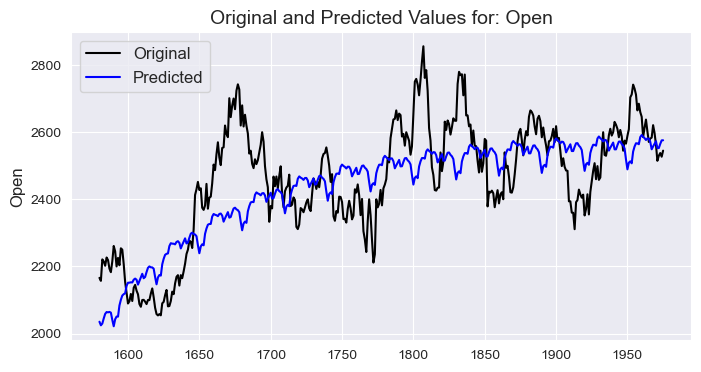

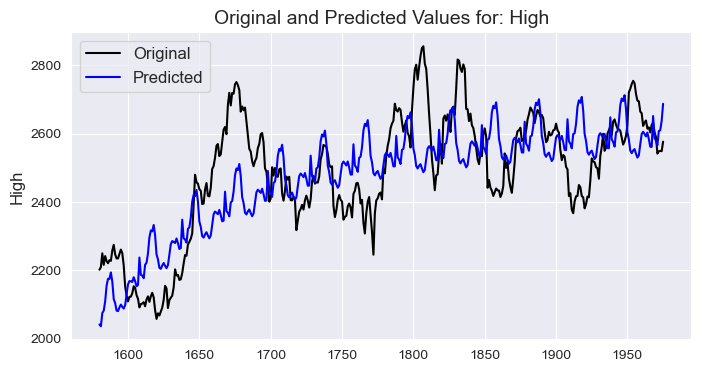

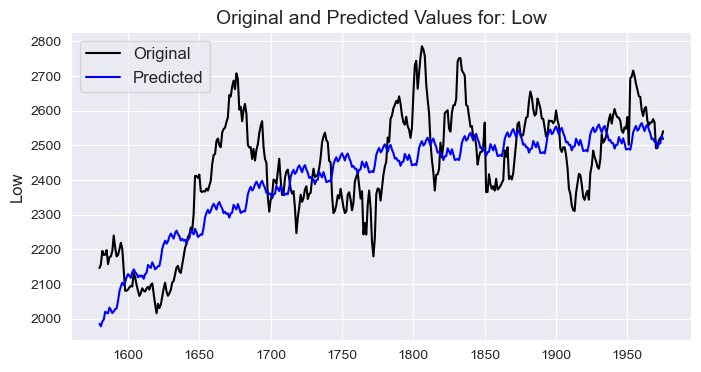

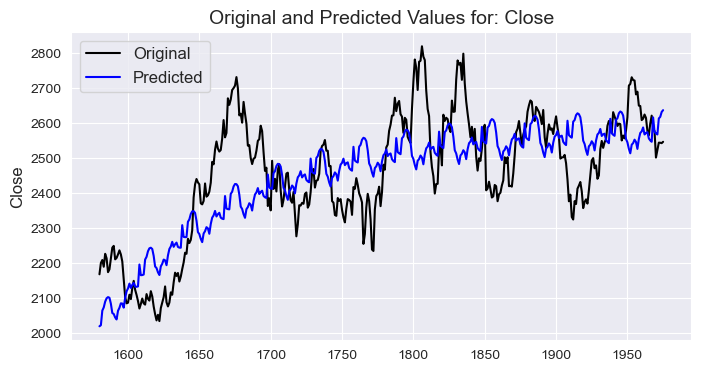

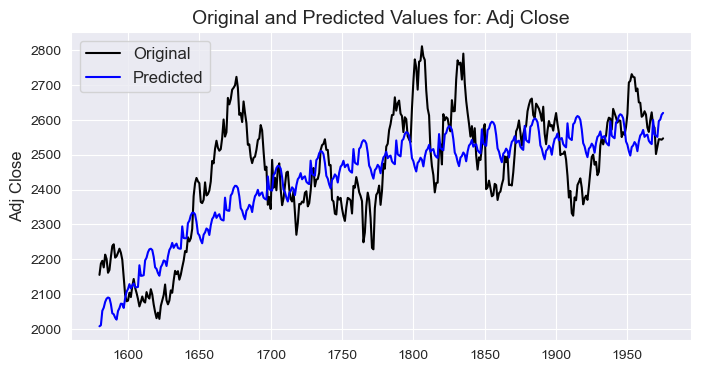

In [606]:
col = ['Open', 'High', 'Low', 'Close', 'Adj Close']
# col = ['Open','High']

for i in col:
    plt.figure(figsize=(8,4))
    plt.plot(stock[i].iloc[-len(predictions_hwe):], color = 'black', label = 'Original')
    plt.plot(predictions_hwe[i], color = 'blue', label = 'Predicted')
    plt.ylabel('%s'%i, fontsize = 12)
    plt.title('Original and Predicted Values for: %s'%i, fontsize = 14)
    plt.legend(loc = 'best', fontsize = 12)
    plt.show()

#### RMSE and MAPE of Values Predicted through Holt Winter's model 

In [608]:
col = ['Open', 'High', 'Low', 'Close', 'Adj Close']
rmse_list_hwe = list()
mape_list_hwe = list()

for i in col:
    rmse_list_hwe.append(sqrt(mean_squared_error(stock[i].iloc[-len(predictions_hwe):], predictions_hwe[i])))
    mape_list_hwe.append(MAPE(predictions_hwe[i], stock[i].iloc[-len(predictions_hwe):]))

error_df_hwe = pd.DataFrame({'RMSE': np.round(rmse_list_hwe,2), 'MAPE' : np.round(mape_list_hwe,2)}, index = ['Open', 'High', 'Low', 'Close', 'Adj Close'])
print('\033[1m'+ "RMSE and MAPE for Predictions using Holt Winter's Exponential Smoothing Model")
error_df_hwe

RMSE and MAPE for Predictions using Holt Winter's Exponential Smoothing Model


RMSE  MAPE
Open       129.98  4.27
High       134.94  4.34
Low        127.77  4.24
Close      129.09  4.26
Adj Close  129.30  4.23

In [609]:
# Adding Date Column to predictions 
date_df_hwe = pd.DataFrame()
date_df_hwe['Date'] = stock['Date'].iloc[-len(predictions_hwe):] 
predictions_hwe.insert(0,'Date', date_df_hwe['Date'])

#### Forecasting for a Month

In [610]:
forecast_hwe = pd.DataFrame()
col = ['Open', 'High', 'Low', 'Close', 'Adj Close']
days_hwe = 30
for i in col:
    model_hwe =  ExponentialSmoothing(stock[i], damped_trend=True,trend = 'add',seasonal = 'mul',
                 seasonal_periods = 30).fit(smoothing_level = smoothing_df[i][0],
                 smoothing_trend = smoothing_df[i][1], smoothing_seasonal = smoothing_df[i][2])
    forecast_hwe[i] = model_hwe.forecast(steps = days_hwe)

In [611]:
# Saving the Holt Winter's Model
file = open('model_hwe.sav', 'wb')
dump(model_hwe,file)
file.close()

In [612]:
# Adding Date Column to predictions 
date_df_fc_hwe = pd.DataFrame()
date_df_fc_hwe['Date'] = pd.date_range(stock['Date'].iloc[-1], periods = days_hwe+1, freq = 'B')
date_df_fc_hwe.drop(date_df_fc_hwe.index[0], inplace = True) # includes start date, so we drop it
indexing_fc_hwe = pd.Index(range(len(stock),len(stock)+len(forecast_hwe)))
date_df_fc_hwe.set_index(indexing_fc_hwe, inplace = True) # reset the index to start after the last date of stock dataframe
forecast_hwe.insert(0,'Date', date_df_fc_hwe['Date'])

In [613]:
pd.date_range(stock['Date'].iloc[-1], periods = days_hwe+1, freq = 'B')

DatetimeIndex(['2022-12-30', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-09', '2023-01-10',
               '2023-01-11', '2023-01-12', '2023-01-13', '2023-01-16',
               '2023-01-17', '2023-01-18', '2023-01-19', '2023-01-20',
               '2023-01-23', '2023-01-24', '2023-01-25', '2023-01-26',
               '2023-01-27', '2023-01-30', '2023-01-31', '2023-02-01',
               '2023-02-02', '2023-02-03', '2023-02-06', '2023-02-07',
               '2023-02-08', '2023-02-09', '2023-02-10'],
              dtype='datetime64[ns]', freq='B')

#### Visualizing the Forecast 

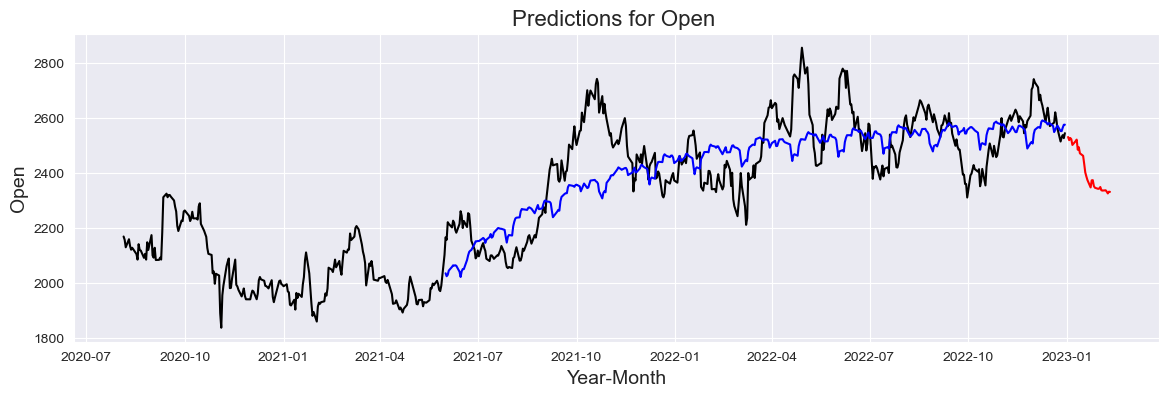

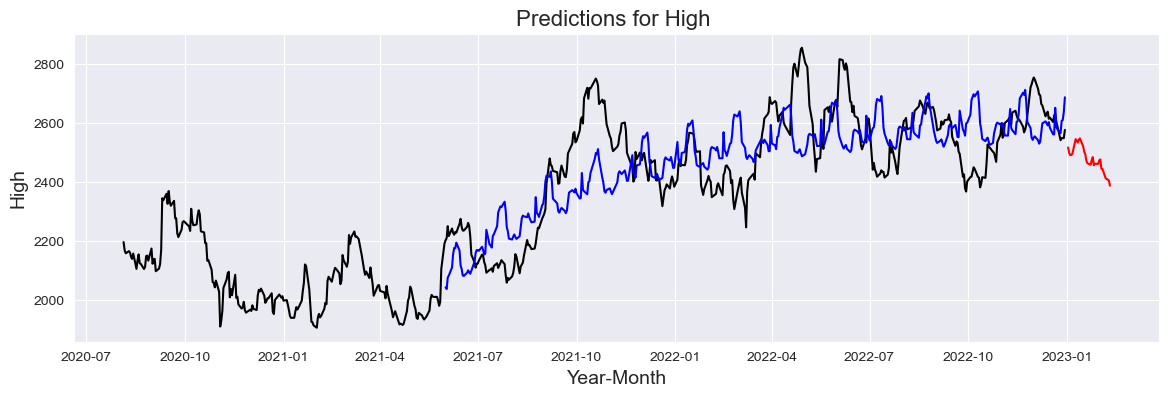

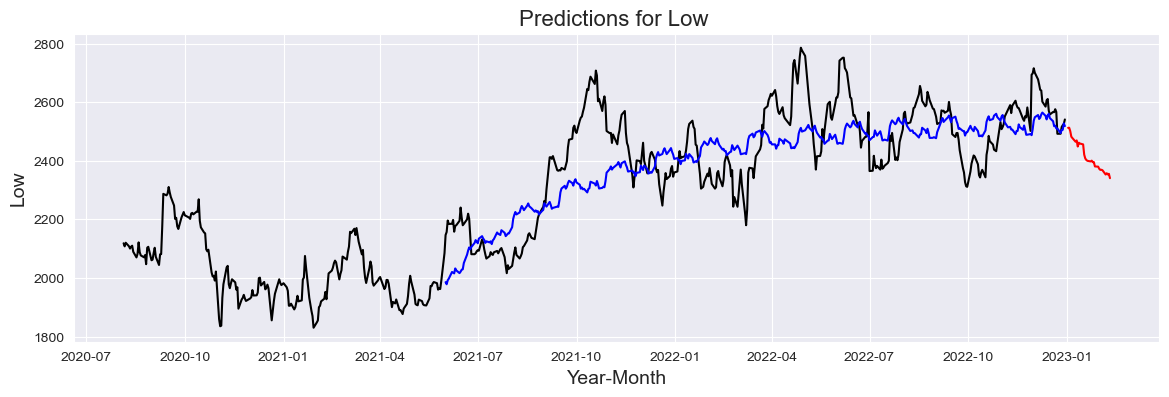

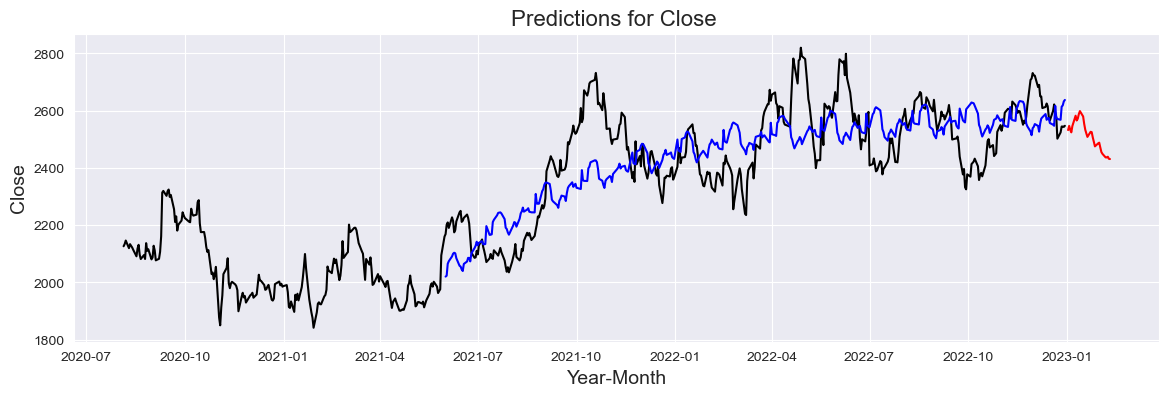

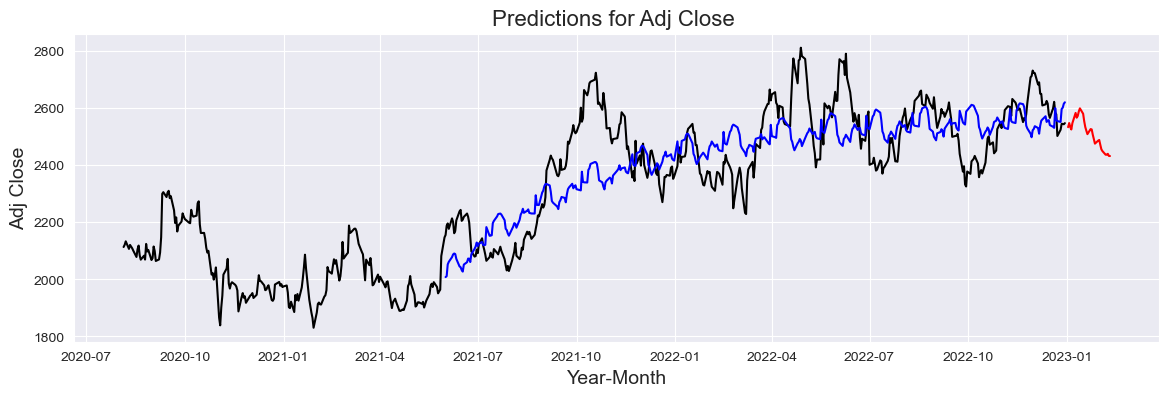

In [614]:
col = ['Open', 'High', 'Low', 'Close', 'Adj Close']

for i in col:
    plt.figure(figsize = (14,4))
    plt.plot(stock['Date'].iloc[-600:], stock[i].iloc[-600:], color = 'black')
    plt.plot(predictions_hwe['Date'], predictions_hwe[i], color = 'blue')
    plt.plot(forecast_hwe['Date'], forecast_hwe[i], color = 'red')
    plt.ylabel('%s'%i, fontsize = 14)
    plt.xlabel('Year-Month', fontsize = 14)
    plt.title('Predictions for %s '%i, fontsize = 16 )

In [615]:
print('\033[1m'+ 'Forecast for One Day:')
forecast_hwe.head(1)

Forecast for One Day:


Date         Open         High          Low        Close  \
1976 2023-01-02  2531.168089  2517.505176  2512.593911  2532.336186   

        Adj Close  
1976  2533.067778

In [616]:
print('\033[1m'+ 'Forecast for One Week:')
forecast_hwe.head(5)

Forecast for One Week:


Date         Open         High          Low        Close  \
1976 2023-01-02  2531.168089  2517.505176  2512.593911  2532.336186   
1977 2023-01-03  2519.752484  2498.971537  2512.855722  2546.851039   
1978 2023-01-04  2527.615128  2491.169573  2501.324894  2532.980101   
1979 2023-01-05  2522.763760  2491.797588  2482.286987  2524.304469   
1980 2023-01-06  2502.245801  2496.068009  2477.686406  2546.596640   

        Adj Close  
1976  2533.067778  
1977  2547.546564  
1978  2533.671727  
1979  2524.965197  
1980  2547.226526

In [617]:
print('\033[1m'+ 'Forecast for One Month:')
forecast_hwe

Forecast for One Month:


Date         Open         High          Low        Close  \
1976 2023-01-02  2531.168089  2517.505176  2512.593911  2532.336186   
1977 2023-01-03  2519.752484  2498.971537  2512.855722  2546.851039   
1978 2023-01-04  2527.615128  2491.169573  2501.324894  2532.980101   
1979 2023-01-05  2522.763760  2491.797588  2482.286987  2524.304469   
1980 2023-01-06  2502.245801  2496.068009  2477.686406  2546.596640   
1981 2023-01-09  2516.026798  2545.513759  2464.946755  2582.392621   
1982 2023-01-10  2521.679212  2541.288051  2469.543562  2565.732023   
1983 2023-01-11  2484.809647  2534.097060  2448.673850  2571.948279   
1984 2023-01-12  2493.914240  2544.038444  2461.735660  2588.062850   
1985 2023-01-13  2471.799860  2548.131415  2458.978955  2598.522086   
1986 2023-01-16  2462.695934  2521.762122  2455.994266  2579.739861   
1987 2023-01-17  2433.286234  2502.848749  2421.090805  2553.673356   
1988 2023-01-18  2402.169968  2494.188182  2407.975512  2533.251219   
1989 2023-01-19  2387.699798  2472.511923  2402.800379  2520.453498   
1990 2023-01-20  2374.640497  2463.760508  2399.945370  2508.441973   
1991 2023-01-23  2347.545113  2458.610083  2397.805694  2526.249209   
1992 2023-01-24  2373.479916  2474.382613  2400.488697  2524.910488   
1993 2023-01-25  2374.144718  2484.682024  2395.385771  2506.437547   
1994 2023-01-26  2352.680035  2456.794619  2395.500067  2491.151783   
1995 2023-01-27  2346.465302  2462.294467  2380.690871  2475.349381   
1996 2023-01-30  2342.524928  2461.318523  2379.983213  2485.808700   
1997 2023-01-31  2343.196167  2473.264296  2372.597288  2488.185173   
1998 2023-02-01  2349.187343  2476.791505  2368.913904  2471.401694   
1999 2023-02-02  2337.288232  2445.593567  2369.359271  2455.567432   
2000 2023-02-03  2336.174285  2444.712976  2367.836660  2449.295192   
2001 2023-02-06  2337.209456  2412.709945  2353.066930  2436.585859   
2002 2023-02-07  2332.285882  2409.667940  2357.582985  2436.672330   
2003 2023-02-08  2325.814320  2408.177653  2353.251204  2439.097225   
2004 2023-02-09  2332.000800  2405.148190  2355.476317  2431.731858   
2005 2023-02-10  2331.526488  2387.498464  2340.686077  2431.088015   

        Adj Close  
1976  2533.067778  
1977  2547.546564  
1978  2533.671727  
1979  2524.965197  
1980  2547.226526  
1981  2583.000718  
1982  2566.297821  
1983  2572.478867  
1984  2588.558811  
1985  2598.978081  
1986  2580.147397  
1987  2554.030397  
1988  2533.558837  
1989  2520.710536  
1990  2508.649897  
1991  2526.422974  
1992  2525.046193  
1993  2506.537861  
1994  2491.213676  
1995  2475.375047  
1996  2485.804746  
1997  2488.156366  
1998  2471.352981  
1999  2455.503297  
2000  2449.210304  
2001  2436.489311  
2002  2436.562396  
2003  2439.747777  
2004  2432.376355  
2005  2431.971919

### Visualization of Forecast Stock Prices against Actual Stock Prices

In [625]:
actual_stock = yf.download(req_stock+'.NS',forecast_hwe['Date'].iloc[0],forecast_hwe['Date'].iloc[-1])

[*********************100%***********************]  1 of 1 completed


In [626]:
actual_stock.reset_index(inplace = True)

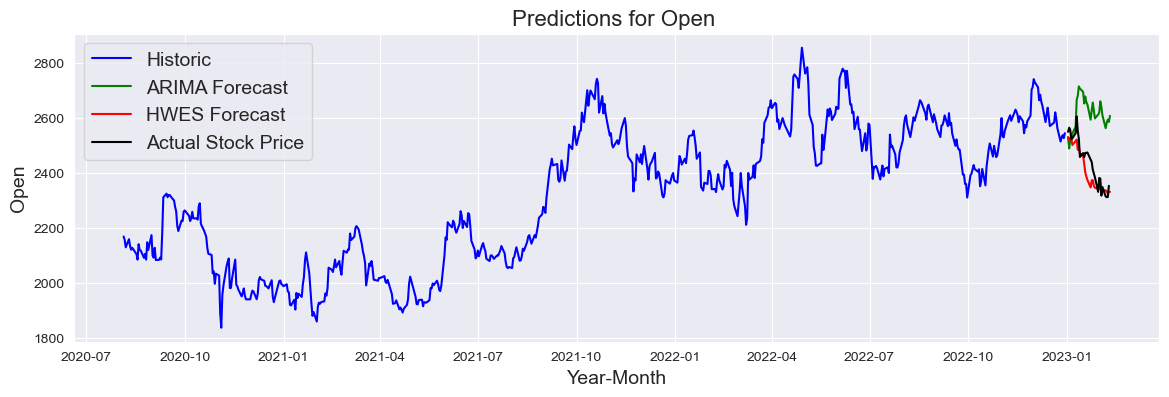

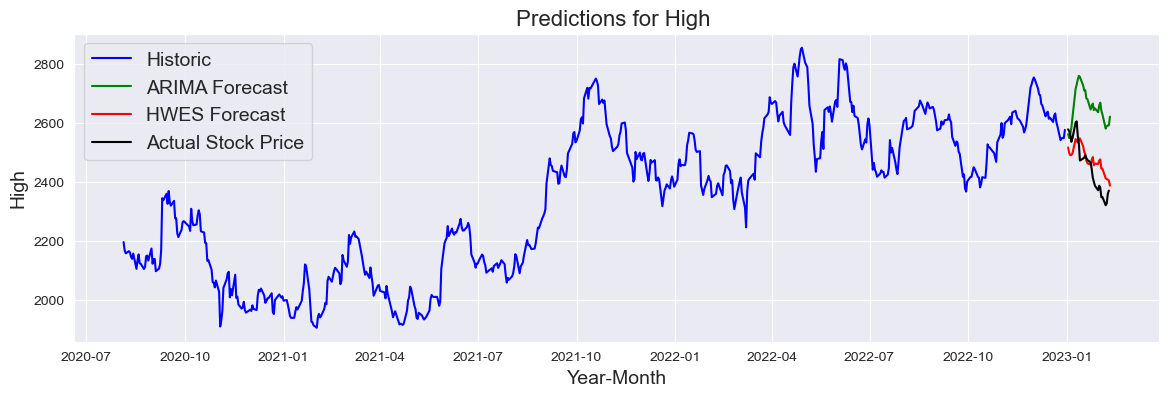

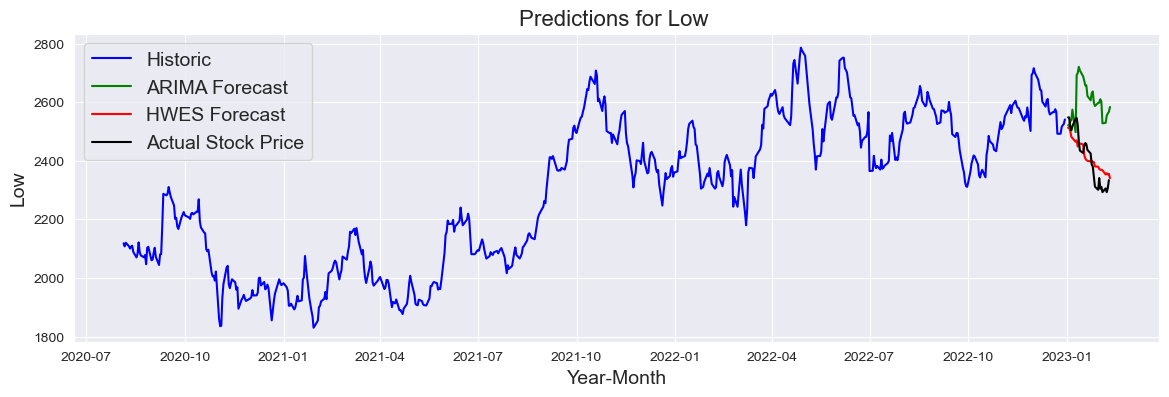

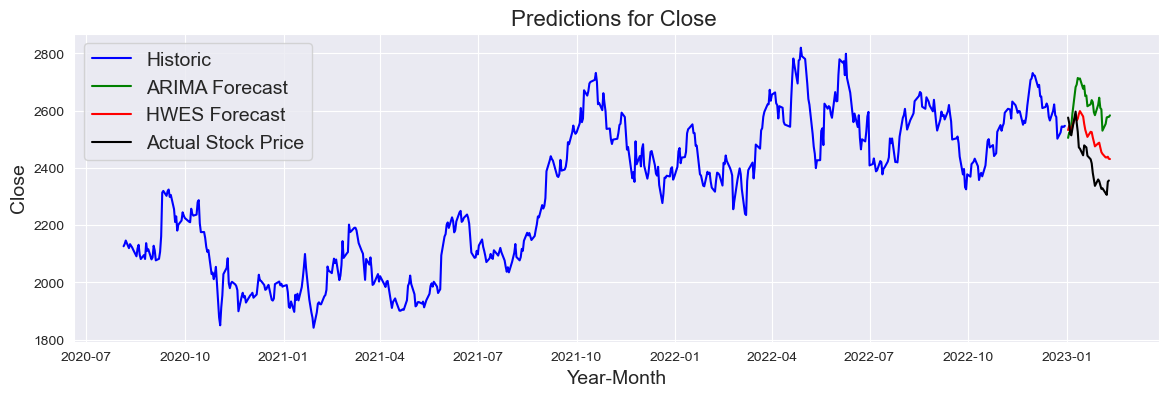

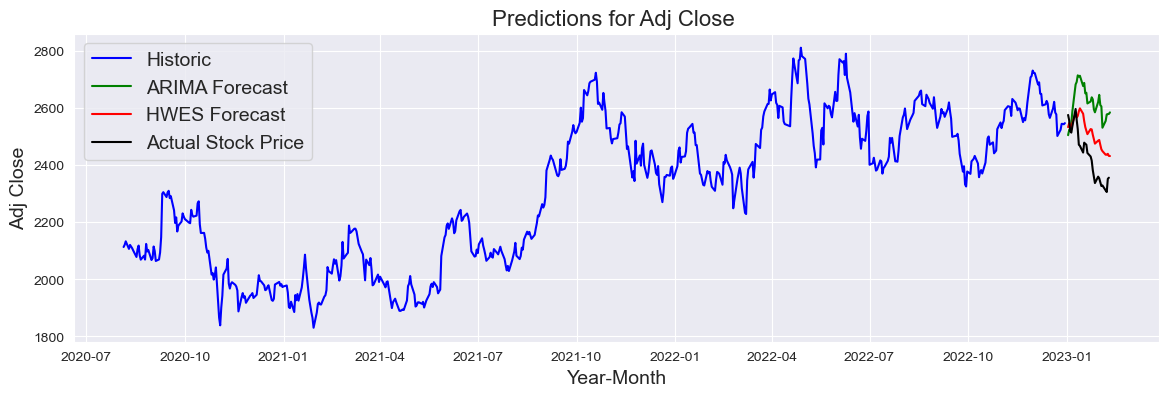

In [628]:
col = ['Open', 'High', 'Low', 'Close', 'Adj Close']

for i in col:
    plt.figure(figsize = (14,4))
    plt.plot(stock['Date'].iloc[-600:], stock[i].iloc[-600:], color = 'blue', label = 'Historic')
#     plt.plot(predictions_indexed['Date'], predictions_indexed[i], color = 'blue')
    plt.plot(forecast_indexed['Date'], forecast_indexed[i], color = 'green', label = 'ARIMA Forecast')    
    plt.plot(forecast_hwe['Date'], forecast_hwe[i], color = 'red',  label = 'HWES Forecast')
    plt.plot(actual_stock['Date'], actual_stock[i], color = 'black',  label = 'Actual Stock Price')
    plt.ylabel('%s'%i, fontsize = 14)
    plt.xlabel('Year-Month', fontsize = 14)
    plt.legend(loc ='best', fontsize = 14)
    plt.title('Predictions for %s '%i, fontsize = 16 )